# Executive Summary #
The analysis aimed to predict used car prices based on car attributes using various regression models: linear regression, lasso regression, ridge regression, random forest regression, and a neural network. Here's a summary of the findings:

Linear Regression: This model showed moderate performance in predicting used car prices. It assumes a linear relationship between the input features and the target variable and provides interpretable coefficients.

Lasso Regression: This model showed poor performance. Lasso regression automatically selects relevant features by shrinking the coefficients of irrelevant or less important features to zero. It helps mitigate overfitting and provides a sparse model with a subset of the most important features.

Ridge Regression: This model showed the poorest performance. Ridge regression also addresses overfitting by adding a penalty term to the sum of squared coefficients. It does not perform feature selection explicitly but can shrink the coefficients of less important features.

Random Forest Regression: This model showed the best performance. This model uses an ensemble of decision trees to predict prices. It captures non-linear relationships and interactions between features and provides good predictive performance. It also offers feature importance measures.

Neural Network: This model showed the 2nd best performance.  Neural networks are powerful models that can learn complex patterns and relationships. They capture non-linearities and interactions effectively but may require more computational resources and data.

In addition two methods of imputation of missing variables were used:  Manual imputation and algorithmic imputation using K-nearest neighbors.

Each model has its strengths and weaknesses, such as interpretability, computational requirements, and performance metrics. The choice of the most suitable model depends on the specific requirements and objectives of the analysis.

Based on the analysis conducted, the random forest regression model demonstrated the best performance in predicting used car prices based on car attributes. Therefore, the recommendation is to use the random forest regression model for this specific task. The random forest model captures non-linear relationships and interactions between features, providing accurate predictions and feature importance measures.


# Problem and Solution Summary #

Accurately estimating the value or price of a used vehicle is crucial for both buyers and sellers. Determining an appropriate price can be challenging due to the complicated dependence on various factors such as the car's make, model, mileage, age, condition, and location. By utilizing  data science and machine learning techniques, we can develop a predictive model that provides reliable price estimates for used cars. In the course of this development, several maching learning techniques were investigated:  ordinary linear regression, linear regression with Lasso and Ridge regularization, random-forest regression, and finally neural-network.



### **The objective:**
The objective of this work is to develop a machine learning model that can accurately predict the value of a used car. This model can be used by potential buyers to assess the fairness of prices offered by sellers.  It can also be used by sellers to set competitive prices for their used cars.  Several models will be evaluated for accuracy, ease of implementation, and ease of interpretation.

### **The key questions:**
- What are the relevant features that influence the price of a used car?
- How can the data be prepared/preprocessed for training the machine learning model?
- Which machine learning algorithms work best for predicting used car values?

### **The problem formulation**:
Using data science and machine learning techniques, the goal is to solve the problem of accurately predicting the value of used cars. This involves training a machine learning model using historical data that includes features such as the make, model, mileage, age, condition, location, and other factors of used cars.

### **Key Takaways**:
**Three methods were tried to predict the used car values:**

**First Method**
- Manually imputed data follwed by ordinary least squares regression using statsmodels.  Variables with high VIF >5 and high p-values >0.05 were systemitally eliminated to produce a final model.
- Missing data was manually imputed using median values when grouped by combinations of Make, Model, and year.
- K-fold cross validation reveals that this model is expected to produce an R-sq value of 0.91 on new data sets and obtain a mean absolute percentage error of 17.02%

**Second Method**
- Manually imputed data followed by random forest regression usind Scikit-learn.
- Hyperparameters were tuned using GridsearchCV with Pipline from scikit-learn.
- K-fold cross validation on the tuned model reveals that this method is expected to produce an R-sq of 0.94  and  a mean absolute percentage error of 12.11% on new data sets

**Third Method**
- KNNimputer was used to automatically impute missing data followed by random forest regression
- Hyperparameters for KNNImputer and RandomForestRegressor were optimized using GridsearchCV
- Pipeline was used to automate the process
- K-fold cross validation on the tuned model reveals that this method is expected to produce an R-sq of 0.94 and a mean absolute percentage error of 12.66% on new data sets


## **Final Solution**
Of these three methods, I would recommend the third.  It does not have potential data leakage from manually imputing the train and test data together.  It also guarantees that the imputation process is consistent.  It is tied for best R-sq with the second method.  The notable disadvantages are the computation is noticeabley slower and it does not yield results which are as interpretable as the linear regression method.  However, this is likely offset by the fact that the imputation is automated an human interaction is not needed.  If interpretretable results are desired, the the first method is recommended


## **Recomendations for Implementation**


We recommend the following actions for implementing this solutions:
Collect high-quality data on car attributes.
Ensure data privacy and security.
Allocate resources for model development.
Develop and validate the random forest regression model.
Evaluate model performance regularly.
Consider interpretability and explainability of the model.
Integrate the model into existing systems.
Monitor and update the model over time.
Document the implementation process and communicate findings.
Use model insights for continuous improvement in pricing and inventory management.


### **Data Dictionary**

**S.No.** : Serial Number

**Name** : Name of the car which includes Brand name and Model name

**Location** : The location in which the car is being sold or is available for purchase (Cities)

**Year** : Manufacturing year of the car

**Kilometers_driven** : The total kilometers driven in the car by the previous owner(s) in KM

**Fuel_Type** : The type of fuel used by the car (Petrol, Diesel, Electric, CNG, LPG)

**Transmission** : The type of transmission used by the car (Automatic / Manual)

**Owner** : Type of ownership

**Mileage** : The standard mileage offered by the car company in kmpl or km/kg

**Engine** : The displacement volume of the engine in CC

**Power** : The maximum power of the engine in bhp

**Seats** : The number of seats in the car

**New_Price** : The price of a new car of the same model in INR 100,000

**Price** : The price of the used car in INR 100,000 (**Target Variable**)


**Load Libraries**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib import style

from joypy import joyplot

import math

import scipy.stats as stats

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.stats.api as sms
import statsmodels.stats.diagnostic as sd

from sklearn import linear_model, metrics, svm
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_absolute_percentage_error as mape
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score
from sklearn.utils import shuffle
from sklearn.ensemble import RandomForestRegressor as RFR
from sklearn.impute import KNNImputer
from sklearn.pipeline import Pipeline
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import Lasso, Ridge


from yellowbrick.regressor import ResidualsPlot

import os
print('Default directory started as: ', os.getcwd())
os.chdir('/home/cualum/Documents/Class/Capstone/Machine Learning Regression/')
print('Directory changed to:  ',os.getcwd())

os.environ['PYTHONWARNINGS']='ignore'

import warnings
warnings.filterwarnings("ignore")

from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
display(HTML("<style>.output_result { max-width:100% !important; }</style>"))


plt.style.use('seaborn-darkgrid')

Default directory started as:  /home/cualum/Documents/Class/Capstone/Machine Learning Regression
Directory changed to:   /home/cualum/Documents/Class/Capstone/Machine Learning Regression


**Define useful functions**

In [2]:
# Function to plot a boxplot and a histogram along the same scale and print skew on plot
def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """       
    quant1, quant3 = np.nanpercentile(data[feature], [25,75])
    
    #filter data for outliers
    outliers = data[feature][(data[feature] < (quant1 - (1.5*(quant3-quant1)))) | (data[feature] > (quant3 + (1.5*(quant3-quant1)))) ]
    
    # Calculate percentage of outliers
    outliers_p = round(outliers.count()/data[feature].count()*100, 2)
    print('Outlier percentage for variable', feature, 'is', outliers_p, '%')
    
    skew = stats.skew(data[feature], nan_policy = 'omit')
    text = 'Skew:  ' + str(round(skew, 2))
    
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows = 2,      # Number of rows of the subplot grid = 2
        sharex = True,  # x-axis will be shared among all subplots
        gridspec_kw = {"height_ratios": (0.25, 0.75)},
        figsize = figsize,
    )                   # Creating the 2 subplots
    sns.boxplot(data = data, x = feature, ax = ax_box2, showmeans = True, color = "violet"
    )                   # Boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data = data, x = feature, kde = kde, ax = ax_hist2, bins = bins, palette = "winter"
    ) if bins else sns.histplot(
        data = data, x = feature, kde = kde, ax = ax_hist2
    )                   # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color = "green", linestyle = "--"
    )                   # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color = "black", linestyle = "-"
    )  # Add median to the histogram
    ax_hist2.text(0.85, 0.9, text, transform = ax_hist2.transAxes)
    ax_box2.set(xlabel = None)
    plt.show()

    
    
    
    
# Function to get VIF and P-Values and put them in a dataframe
def vif_pvalue(model, predictors, target):
    """
    Produce variance inflaction factor and P_value for predictors of a model
    Model:  Statsmodels model object
    Predictors: dataframe of predictors
    Target:  dataframe of target
    """
    
    # Calculate VIF's
    vif_series = pd.Series(
        [round(variance_inflation_factor(predictors.values, i),3) for i in range(predictors.shape[1])],
        index = predictors.columns,
        dtype = float, name = 'VIF')
    
    # Calculate P_values
    p_series = pd.Series(
        [round(model.pvalues[i],3) for i in range(predictors.shape[1])],
        index = predictors.columns,
        dtype = float, name = 'P values')
    
    # Put VIF's and P-values into dataframe
    metric_summ = pd.merge(vif_series, p_series, right_index = True,
                           left_index = True)
    
    # Order dataframe by VIF if any VIF values is larger than 5, otherwise order by P_value
    # Makes elimination easier
    if metric_summ.drop(labels = ['const'], axis = 0).VIF.max() >= 5:
        metric_summ = metric_summ.sort_values(by = 'VIF', ascending = False)
    else:
        metric_summ = metric_summ.sort_values(by = 'P values', ascending = False)
    
    return metric_summ



# Function to put compute model evaluation metrics and puth them is a data frame
def model_performance(model, predictors, target):
    summary = pd.DataFrame()
    
    # Predicted values
    ypred = model.predict(predictors)
    
    # Compute R-squared
    corr_matrix = np.corrcoef(ypred, target)
    corr = corr_matrix[0,1]
    R_sq = corr**2
    
    # Compute R-squared adjusted
    R_sq_adj = 1-(1-R_sq)*(predictors.shape[0]-1)/(predictors.shape[0]-predictors.shape[1]-1)
    
    # Put fit evaluation parameters into data frame
    summary.loc[0, 'MAE'] = np.abs(ypred - target).mean()
    summary.loc[0,'MAPE (%)']  = (np.abs((ypred - target)/target).mean()*100)
    summary.loc[0,'RMSE']  = (np.sqrt(np.mean(np.square(ypred - target))))
    summary.loc[0,'R-sq'] = R_sq
    summary.loc[0,'R-sq adj'] = R_sq_adj
    summary.loc[0, '# of recores'] = len(target)
    
    return summary




# Function to test normality of a regression model (statsmodels)
def normality(model, predictors, target):
    
    # Get residuals and mean of residuals
    residual = model.resid
    residual_mean = residual.mean()
    plt.subplots(1,3, figsize = (12,4))
    
    # Create subplot
    plt.subplot(1,3,1)
    
    # Plot residuals vs fitted values
    sns.regplot(x = model.predict(predictors), y = model.resid, lowess = True, line_kws={"color": "red"}, marker = '+')
    plt.xlabel("Fitted Values")
    plt.ylabel("Residual")
    plt.title("Residual PLOT")
    
    # Plot histogram of residuals and title with the residual mean
    plt.subplot(1,3,2)
    sns.histplot(model.resid, kde = True)
    text = 'Residual mean: ' + str(residual_mean)
    plt.title(text)
    plt.xlabel('Residual')
    
    # Plot target vs fitted values
    plt.subplot(1,3,3)
    sns.regplot(x = target, y = model.fittedvalues, lowess= True, line_kws={"color": "red"}, marker = '+')
    plt.xlabel('Target')
    plt.ylabel('Predicted Target')
    plt.title('Prediction')
    plt.show()

    # Apply Goldfeld-quandt test
    gq_test = pd.DataFrame(sms.het_goldfeldquandt(model.resid, predictors)[:-1],
                           columns=['value'],
                           index=['F statistic', 'p-value'])
    
    
    print('Goldfeld-Quandt Test:')
    display(gq_test)
    
    
    
# Look at all the correlations with the target variable "Price"
def target_cor_num(data, target):
    cols = data.columns.to_numpy().tolist()      #List of columns for itneration

    cols.remove(target)       #remove target variable from list

    tarcorrs = pd.DataFrame()  #initialize dataframe for storing correlation values

    k = 0    #  counting variable for subplots

    plt.figure(figsize = (10,15))  #set figure size
    #loop through columns list
    for co in cols:
        if (data[co].dtype != object): # check that columns are numeric
                cor = round(data[co].corr(data[target]), 2)  #compute correlation with target variable
                tarcorrs.loc[k, [target, 'Predictor', 'Correlation']]= ['MEDV', co, cor]  # store in dataframe
                plt.subplot(4,3,k+1) #create subplot
                sns.regplot(y = target, x = co, data=data, scatter_kws={'s':3}) #scatterplot of column with target variable
                plt.title('Correlation = ' + str(cor)) #label plot with correlation
                k += 1 #iterate countering variable for subplot
    
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()
    tarcorrs_sorted = tarcorrs.reindex(tarcorrs.Correlation.abs().sort_values(ascending = False).index)
    display(tarcorrs_sorted)
    
    
    
    
    
#  Loop through data to find columns where abs(corr()) >= 0.7 and plot.  Use double loop with second loop
#  lower bounded by first loop to avoid duplication
def data_cor_num(data, limit):
    cols = data.columns
    iters = len(cols)
    k = 0
    corrs = pd.DataFrame()


    plt.figure(figsize = (10,10))
    for i in range(0, iters-1):    # Loop through all the columns
        for j in range(i+1, iters):      # Loop through all columns after column in previous loop
            if (data[cols[i]].dtype != object) & (data[cols[j]].dtype != object): # check that columns are numeric
                cor = round(data[cols[i]].corr(data[cols[j]]), 2)
                if abs(cor) >= limit:
                    # Insert columns and correlation into dataframe
                    corrs.loc[k, ['Variable #1', 'Variable #2', 'Correlation']]= [cols[i], cols[j], cor]                
                    plt.subplot(3,3,k+1)
                    sns.regplot(x = cols[i], y = cols[j], data=data, scatter_kws={'s':3})
                    plt.title('Correlation: ' + str(cor))
                    # Counter for row index when building dataframe
                    k += 1

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

    
    corrs_sorted = corrs.reindex(corrs.Correlation.abs().sort_values(ascending = False).index)
    display(corrs_sorted)
    
    
    
    
# Function to create boxplot and countplot for categorical variables    
def target_cor_cat(data, target):
    cols = data.columns.to_numpy().tolist()
    cols.remove(target)
    
    for co in cols:
        if (data[co].dtype == object):
            if (data[co].nunique()<35):
                plt.figure(figsize = (10,3))
                sns.boxplot(data, x = co, y = target, order=data[co].value_counts().index)
                plt.xticks(rotation = 90)
                plt.show()
                plt.figure(figsize = (10,3))
                ax = sns.countplot(data, x = co, order=data[co].value_counts().index)
                ax.bar_label(ax.containers[0])
                plt.xticks(rotation = 90)
                plt.show()
        
    

# Section 1 #
## Load data and initial analysis ##

In [3]:
# Load data and inspect contents
data = pd.read_csv('used_cars.csv')
display(data.head())
display(data.info())

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,8.61,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,NaN,17.74


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   float64
 9   Engine             7207 non-null   float64
 10  Power              7078 non-null   float64
 11  Seats              7200 non-null   float64
 12  New_price          1006 non-null   float64
 13  Price              6019 non-null   float64
dtypes: float64(6), int64(3), object(5)
memory usage: 793.4+ KB


None

**Observations**
- Data consists of a list of New and used prices for cars sold in India.  Car names (Make + Model), location, year of car, and various other details are included.
- There are 5 categorical columns and 9 numerical (3 integer and 6 floating) columns.
- The column S.No. will be dropped as it contains no iformation
- The column 'Name' should be split into at least 2 columns (Make and Model)
- S.No. does not contain usefule information so can be dropped
#

**Evaluate summary statistics**

In [4]:
data.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
S.No.,7253.0,NaN,NaN,NaN,3626.0,2093.905084,0.0,1813.0,3626.0,5439.0,7252.0
Name,7253,2041,Mahindra XUV500 W8 2WD,55,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Location,7253,11,Mumbai,949,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Year,7253.0,NaN,NaN,NaN,2013.365366,3.254421,1996.0,2011.0,2014.0,2016.0,2019.0
Kilometers_Driven,7253.0,NaN,NaN,NaN,58699.063146,84427.720583,171.0,34000.0,53416.0,73000.0,6500000.0
Fuel_Type,7253,5,Diesel,3852,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Transmission,7253,2,Manual,5204,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Owner_Type,7253,4,First,5952,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Mileage,7251.0,NaN,NaN,NaN,18.14158,4.562197,0.0,15.17,18.16,21.1,33.54
Engine,7207.0,NaN,NaN,NaN,1616.57347,595.285137,72.0,1198.0,1493.0,1968.0,5998.0


**Observations**
- New_price is missing a large number of values
- There are 11 unique locations
- There are 5 unique Fuel_Types
- There are 2 unique Transmissions
- There are 4 unique Owner-types
- Kilometers_Driven has a maximum value of 6.5 million Kilometers which may be an outlier
- Maximum gass mileage is 33.54
#

**Compute % of missing data for each variable**

In [5]:
data.isnull().sum()/data.shape[0]*100

S.No.                 0.000000
Name                  0.000000
Location              0.000000
Year                  0.000000
Kilometers_Driven     0.000000
Fuel_Type             0.000000
Transmission          0.000000
Owner_Type            0.000000
Mileage               0.027575
Engine                0.634220
Power                 2.412795
Seats                 0.730732
New_price            86.129877
Price                17.013650
dtype: float64

**Observation**
- Several variables have missing values:  Mileage, Engin, Power, Seats, New_price, Price
- 86% of New_price data is missing.  This seems like too much missing data to do imputing.
- 17% of Price data is missing
- Other variables are missing a very low percentage of data

#

**Check for duplicated records**

In [6]:
# Display duplicate records
display(data[data.duplicated(keep = False) == True])

# Drop S.No.  This is useless data and my prevent finding duplications
data.drop(columns = ['S.No.'], axis = 1, inplace = True)

# Display duplicate records after S.No. removed
data[data.duplicated(keep = False) == True]

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price


,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price
6498,Honda City 1.5 E MT,Mumbai,2010,52000,Petrol,Manual,First,17.0,1497.0,118.0,5.0,NaN,NaN
6582,Honda City 1.5 E MT,Mumbai,2010,52000,Petrol,Manual,First,17.0,1497.0,118.0,5.0,NaN,NaN


**Observation** There is a record that appears duplicated.  It is concievable that is is two seperate cars with identical mileage.  Since it is only one record, leave it in.

#

**Check unique values**

In [7]:
display(data.nunique())

print('\n\nUnique Location:', data.Location.unique())

print('\n\nUnique Fuel_Type:', np.sort(data.Fuel_Type.unique()))

print('\n\nUnique Transmission: ', np.sort(data.Transmission.unique()))

print('\n\nUnique Seats: ', np.sort(data.Seats.unique()))

print('\n\nUnique Year: ', np.sort(data.Year.unique()))

print('\n\nUnique Owner_Type: ', np.sort(data.Owner_Type.unique()))

Name                 2041
Location               11
Year                   23
Kilometers_Driven    3660
Fuel_Type               5
Transmission            2
Owner_Type              4
Mileage               438
Engine                150
Power                 383
Seats                   8
New_price             625
Price                1373
dtype: int64



Unique Location: ['Mumbai' 'Pune' 'Chennai' 'Coimbatore' 'Hyderabad' 'Jaipur' 'Kochi'
 'Kolkata' 'Delhi' 'Bangalore' 'Ahmedabad']


Unique Fuel_Type: ['CNG' 'Diesel' 'Electric' 'LPG' 'Petrol']


Unique Transmission:  ['Automatic' 'Manual']


Unique Seats:  [ 2.  4.  5.  6.  7.  8.  9. 10. nan]


Unique Year:  [1996 1998 1999 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010
 2011 2012 2013 2014 2015 2016 2017 2018 2019]


Unique Owner_Type:  ['First' 'Fourth & Above' 'Second' 'Third']


**Observations**
- Nothing unusual here
#

# Section 2 #
## Univariate and multi-variate analysis ##

**Plot distributions for all variables and calculate percentage of outliers**

Outlier percentage for variable Year is 0.8 %


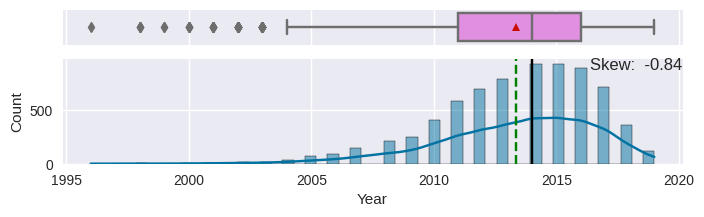

Outlier percentage for variable Kilometers_Driven is 3.56 %


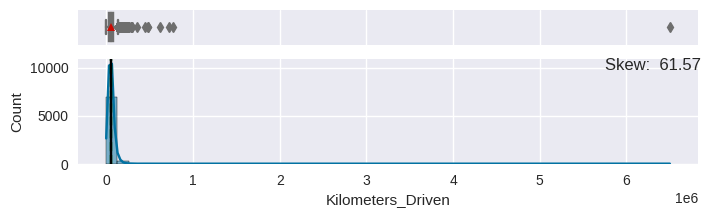

Outlier percentage for variable Mileage is 1.37 %


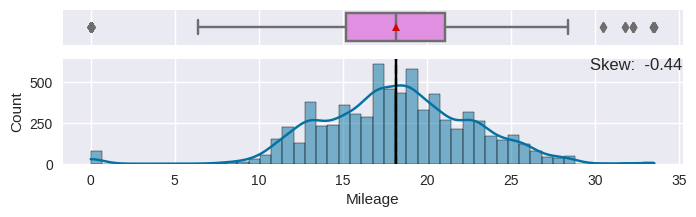

Outlier percentage for variable Engine is 0.9 %


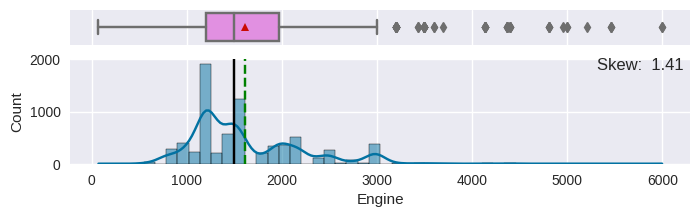

Outlier percentage for variable Power is 3.86 %


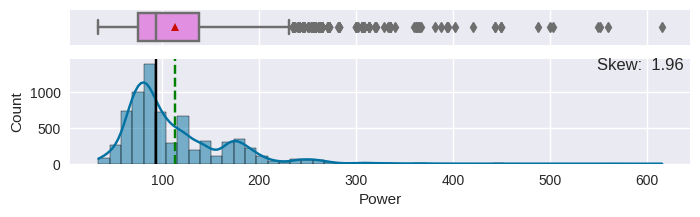

Outlier percentage for variable Seats is 16.0 %


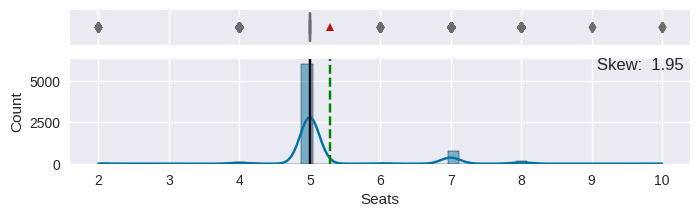

Outlier percentage for variable New_price is 10.74 %


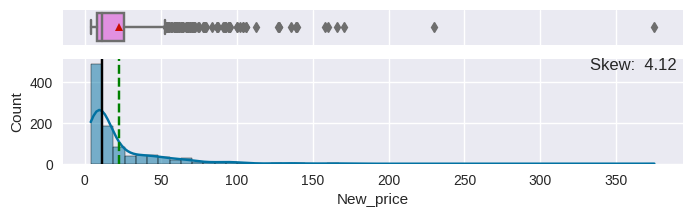

Outlier percentage for variable Price is 11.93 %


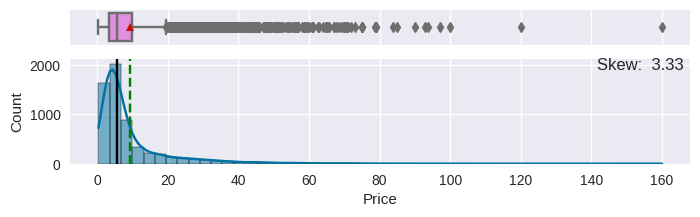

In [8]:
# Loop through columns in data to plot using "histogram_boxplot" function
for col in data.columns:
    if data[col].dtype != object:
        histogram_boxplot(data, col, figsize = (8,2), bins = 50, kde = True)


**Observations**
- Kilometers driven has one extreme outlier that should be removed
- Some records show 0 for mileage - are these mistakes?
- Most care have either 5 or 7 seats
- There are a couple of records with extreme New_prices and the data is skewed right with 10.74% outliers
- There are a couple of records with extreme Price and the data is skewed right wiht 11.93% outliers
#

**Heatmap**

<Axes: >

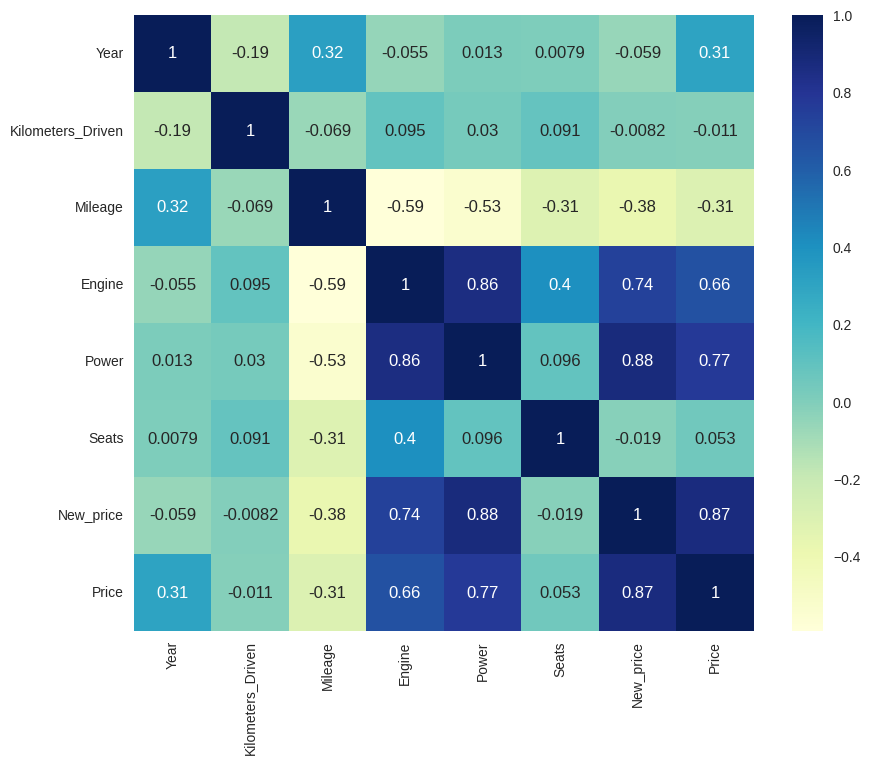

In [9]:
plt.figure(figsize = (10,8))
sns.heatmap(data.corr(numeric_only=True), annot = True, cmap = 'YlGnBu')

**Observations**
- Price is highly correlated with Engine, Power, New_price.
- There is little correlation with Seats
- There is little correlation with Kilometers_Drive which seems suprising
- As expected, there is a strong correlation between the following pairs:
  - Engine and Power
  - New_price and Power
  - New_price and Price
  #

**Look at correlations with the target variable Price**

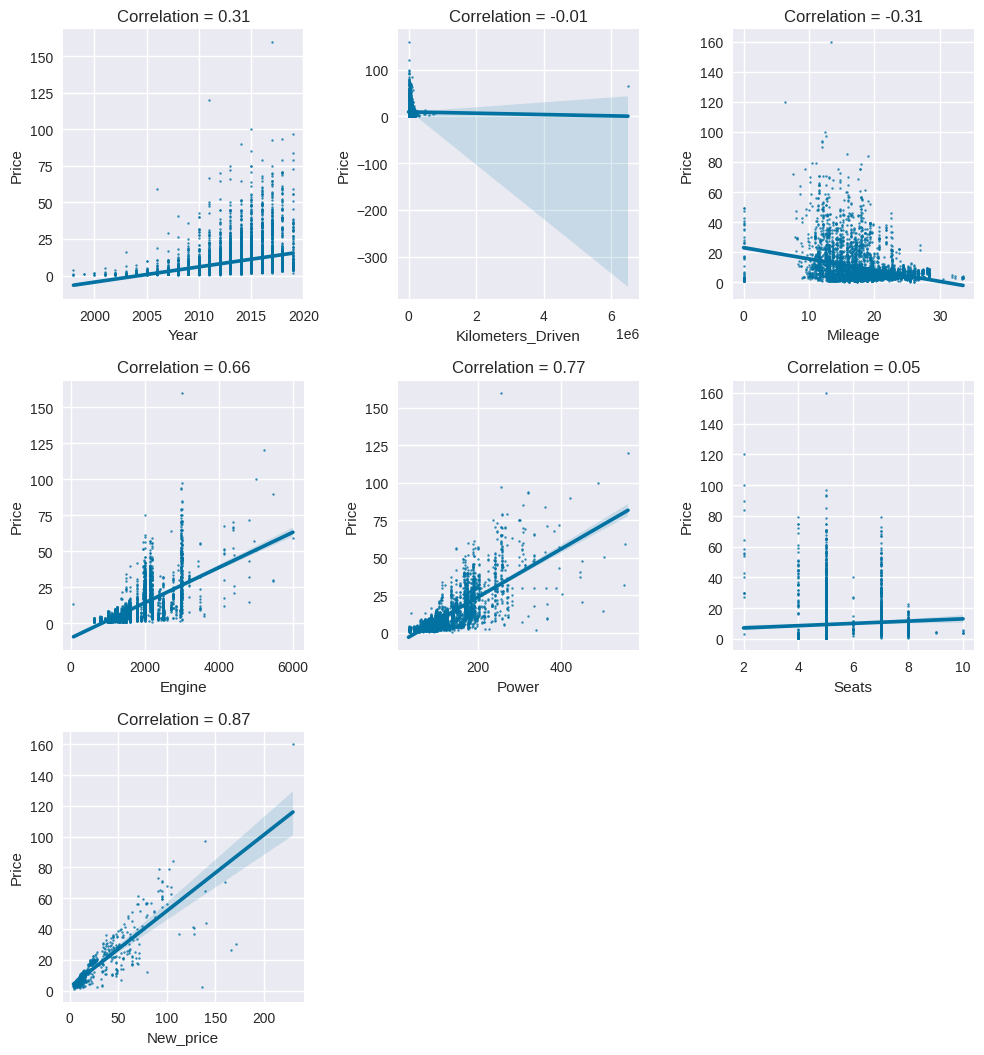

,Price,Predictor,Correlation
6,MEDV,New_price,0.87
4,MEDV,Power,0.77
3,MEDV,Engine,0.66
0,MEDV,Year,0.31
2,MEDV,Mileage,-0.31
5,MEDV,Seats,0.05
1,MEDV,Kilometers_Driven,-0.01


In [10]:
#  Call function to produce scatterplots of all numerical variables vs target
target_cor_num(data, 'Price')

**Observations**
- Best correlation is this New_price.  This is understandable.  Unfortunately, this variable is missing too many values to be useful.
- Second and third best correlation is with Power and Engin.  These two variables are likely correlated so one will end up being removed.
- There is one very extreme outliner for Kilometers_Drive which will be removed now.
#

**Remove extreme outlier from Kilometers_Drives and replot correlation with Price**

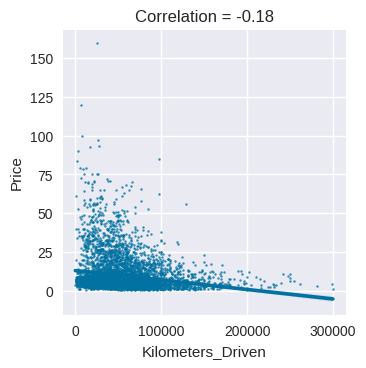

,Price,Predictor,Correlation
0,MEDV,Kilometers_Driven,-0.18


Outlier percentage for variable Kilometers_Driven is 3.46 %


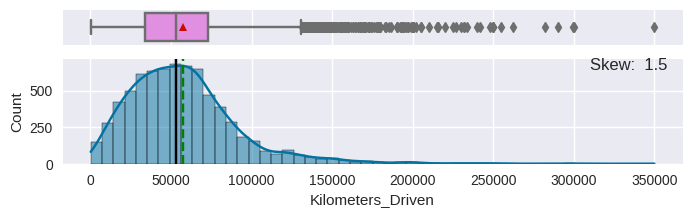

In [11]:
# Remove records with Kilometers_Driven > 400000
data = data[data['Kilometers_Driven']<400000]

# Call function for scatterplot
target_cor_num(data[['Price','Kilometers_Driven']], 'Price')

histogram_boxplot(data, 'Kilometers_Driven', figsize = (8,2), bins = 50, kde = True)

**Observations**
- The correlation between Kilometwes_Driven improves slightly but it is still low

#

**Plot all variable pairs with correlation greater than 0.5**

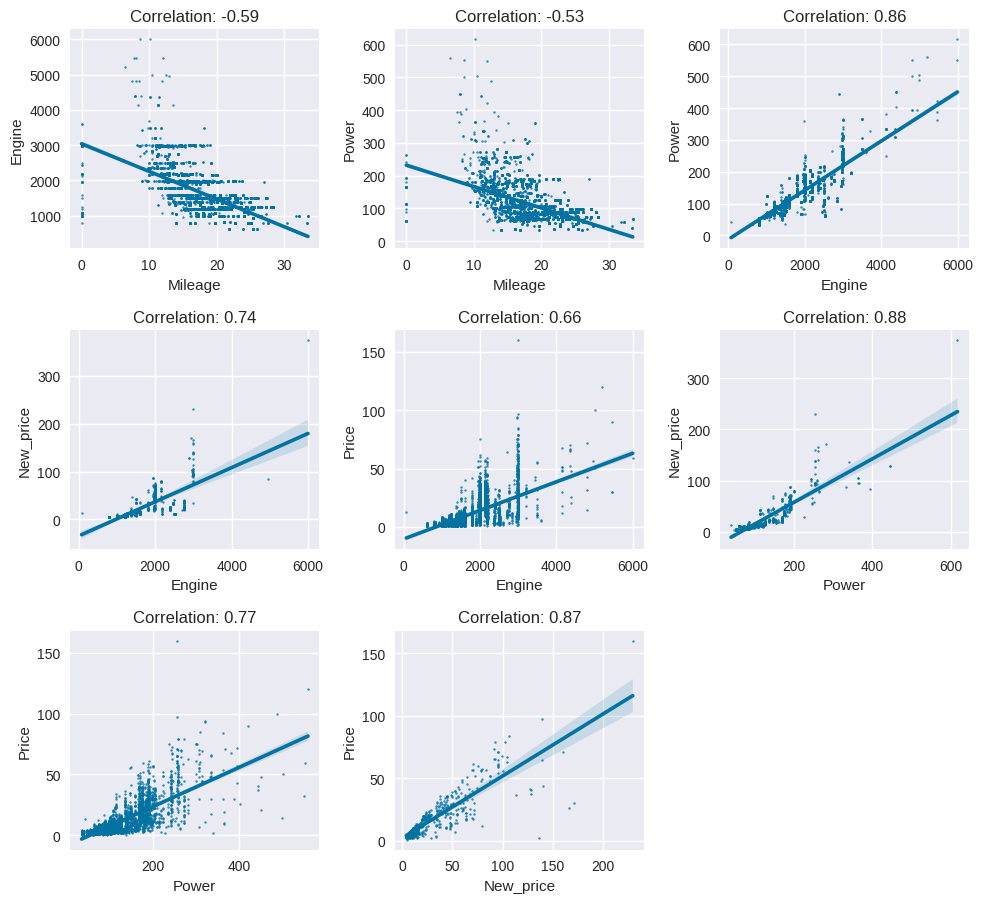

,Variable #1,Variable #2,Correlation
5,Power,New_price,0.88
7,New_price,Price,0.87
2,Engine,Power,0.86
6,Power,Price,0.77
3,Engine,New_price,0.74
4,Engine,Price,0.66
0,Mileage,Engine,-0.59
1,Mileage,Power,-0.53


In [12]:
# Call function for scatterplots
data_cor_num(data, 0.5)

**Observations**
- Engine and Power are highly correlated as expected
- Power and New_price are highly correlated.  This is perhaps expected.  It also means New_price can be dropped and still maintain the same information.
- The reasons for the correlation between Mileage and Engine and Mileage and Power are not obvious to me
#

**Before analyzing categroical data, break Name into Make and Model**

In [13]:
# Copy data for modification
data_copy = data.copy()

# Create column for Make derived from Name
data_copy['Make'] = data_copy['Name'].apply(lambda x: x.split(" ")[0].lower())

# Create column for all other details for Model from Name
data_copy['Model'] = data_copy['Name'].apply(lambda x: ' '.join(x.split(" ")[1:-1]).lower())

# Display Make and Model
display(data_copy['Make'].unique())
display(data_copy['Model'].unique())

array(['maruti', 'hyundai', 'honda', 'audi', 'nissan', 'toyota',
       'volkswagen', 'tata', 'land', 'mitsubishi', 'renault',
       'mercedes-benz', 'bmw', 'mahindra', 'ford', 'porsche', 'datsun',
       'jaguar', 'volvo', 'chevrolet', 'skoda', 'mini', 'fiat', 'jeep',
       'smart', 'ambassador', 'isuzu', 'force', 'bentley', 'lamborghini',
       'hindustan', 'opelcorsa'], dtype=object)

array(['wagon r lxi', 'creta 1.6 crdi sx', 'jazz', ...,
       'tiago 1.05 revotorq xt', 'compass 1.4', 'elite i20 magna'],
      dtype=object)

**Observations**
- Make and Model columns look reasonable
#

**Plot Price boxplots and count barplots for categorical data**

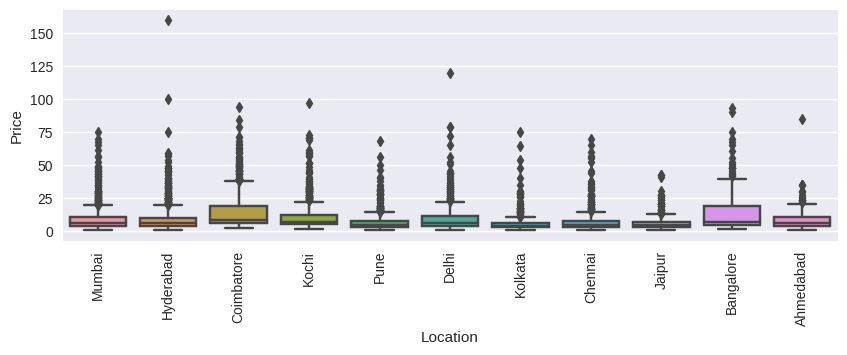

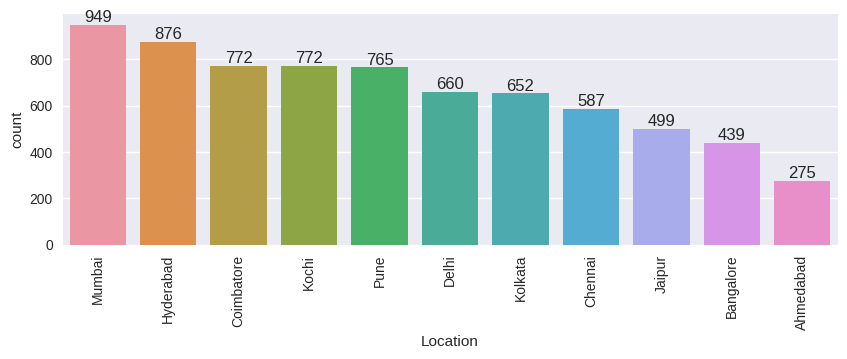

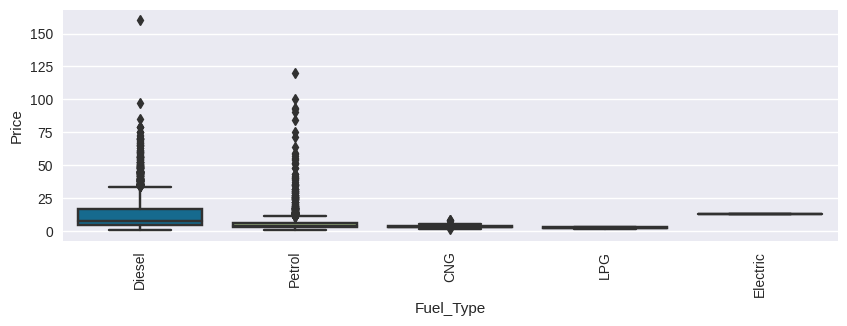

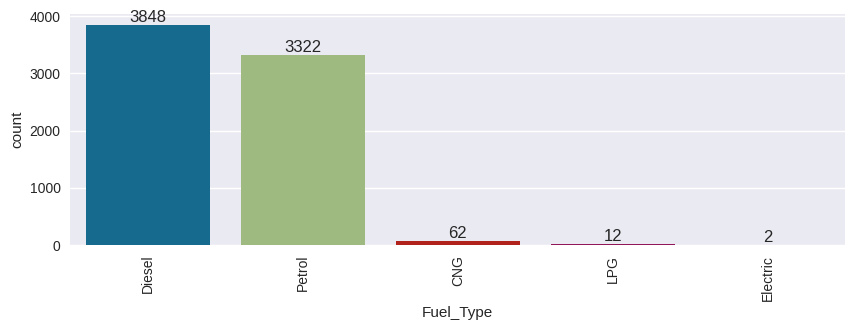

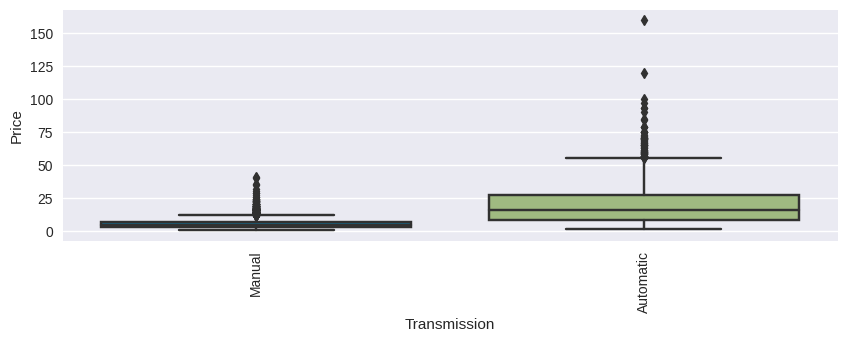

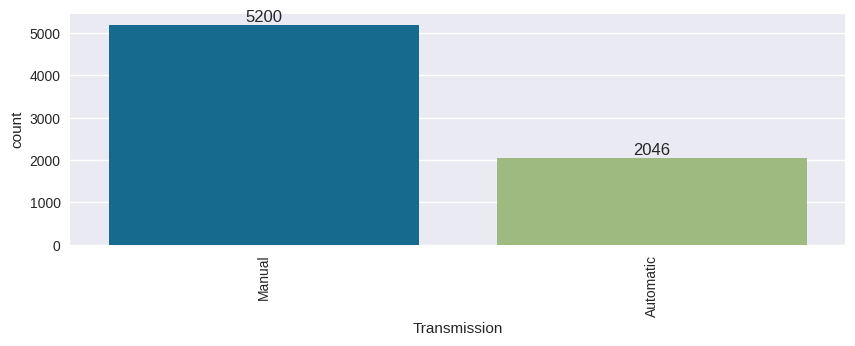

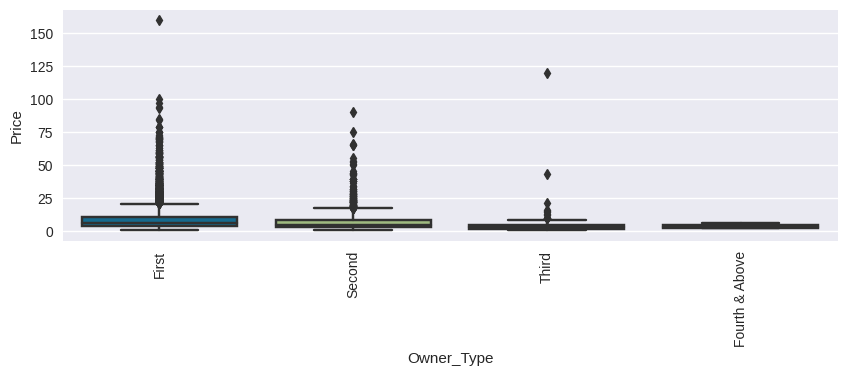

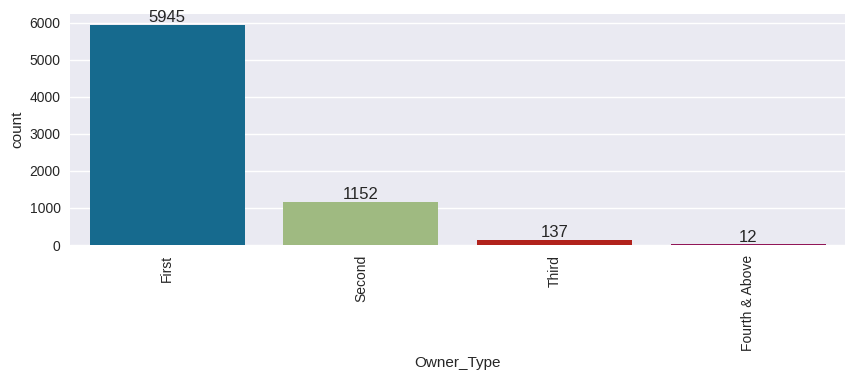

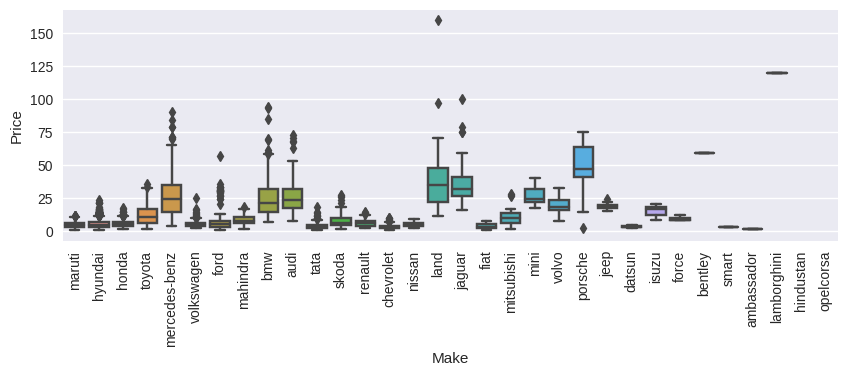

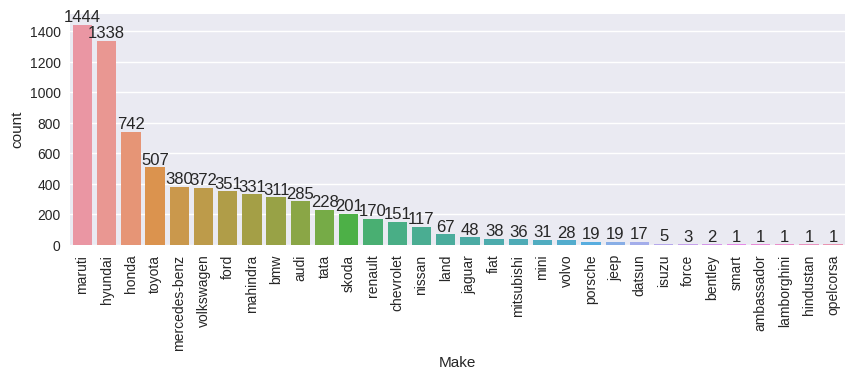

In [14]:
# Call function to make boxplots and countplots for categorical variables
target_cor_cat(data_copy, "Price")

**Observations**
- Best selling Make is Maruti followed by Hyundai
- Most cars are diesel with 2nd as petrol.  There are very few CNG, LPG, and electric.
- Most cars are manual and manual averages a lower price than automatic
- From the Make boxplot, it is apparent that there are 2, maybe 3 distinct groups.  It is probably useful to create a category for luxury and a category for exotic cars. Make can then be eliminated.
- Most transactions are  first time resale
- There are discitinct categories when observing the price vs make boxplot.  Of course those makes that are considered luxury are at a higher price point.  Some models that are considered exotic are even higher still
#

**Examine records for electric vehicles**

In [15]:
# Filter Fuel_Type = Electric
data[data['Fuel_Type'] == 'Electric']

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price
4446,Mahindra E Verito D4,Chennai,2016,50000,Electric,Automatic,First,NaN,72.0,41.0,5.0,13.58,13.00
4904,Toyota Prius 2009-2016 Z4,Mumbai,2011,44000,Electric,Automatic,First,NaN,1798.0,73.0,5.0,NaN,12.75


**Electric vehicles do not have entries for Mileage which makes sense.  Not sure how to correct this since Mileage is not considered in an equivelant fashion for gas vs electric vehicles by consumers.  I think different models should be used for gas and electric vehicles.  Leave records for now**

#
#

# Section 3 ##
## Data imputation and  feature Engineering ##


**Copy for modification**

In [16]:
# Another copy for modificatgion
data_copy2 = data_copy.copy()

**Check percentage of missing values**

In [17]:
# Display percentage of mission data for each variable
data_copy2.isnull().sum()/data_copy2.shape[0]*100

Name                  0.000000
Location              0.000000
Year                  0.000000
Kilometers_Driven     0.000000
Fuel_Type             0.000000
Transmission          0.000000
Owner_Type            0.000000
Mileage               0.027601
Engine                0.634833
Power                 2.415126
Seats                 0.731438
New_price            86.116478
Price                17.030086
Make                  0.000000
Model                 0.000000
dtype: float64

**Observations**
High number of missing values for New_price and Price.  My opinion is neither of these can be fixed.  New_price is missing too many values and target variables should not be imputed

**Remove New_price**
- It has too many missing values and is highly correlated with Engine and Power so little information will be lost.

In [18]:
data_copy2.drop('New_price', axis = 1, inplace = True)
data_copy2.isnull().sum()/data_copy2.shape[0]*100

Name                  0.000000
Location              0.000000
Year                  0.000000
Kilometers_Driven     0.000000
Fuel_Type             0.000000
Transmission          0.000000
Owner_Type            0.000000
Mileage               0.027601
Engine                0.634833
Power                 2.415126
Seats                 0.731438
Price                17.030086
Make                  0.000000
Model                 0.000000
dtype: float64

**Series of imputations will follow for engine, Power, and seats based on combinations of Make/Model/Year**

In [19]:
# Impute missing Engine data using median value from same make/model/year
data_copy2['Engine'] = data_copy2['Engine'].fillna(data_copy2.groupby(['Make', 'Model', 'Year'])['Engine'].transform('median'))
data_copy2.isnull().sum()/data_copy2.shape[0]*100

Name                  0.000000
Location              0.000000
Year                  0.000000
Kilometers_Driven     0.000000
Fuel_Type             0.000000
Transmission          0.000000
Owner_Type            0.000000
Mileage               0.027601
Engine                0.552029
Power                 2.415126
Seats                 0.731438
Price                17.030086
Make                  0.000000
Model                 0.000000
dtype: float64

In [20]:
# Previous imputation corrected some missing values. Impute remaining missing Engine data using median value from same make/model
data_copy2['Engine'] = data_copy2['Engine'].fillna(data_copy2.groupby(['Make', 'Model'])['Engine'].transform('median'))
data_copy2.isnull().sum()/data_copy2.shape[0]*100

Name                  0.000000
Location              0.000000
Year                  0.000000
Kilometers_Driven     0.000000
Fuel_Type             0.000000
Transmission          0.000000
Owner_Type            0.000000
Mileage               0.027601
Engine                0.455424
Power                 2.415126
Seats                 0.731438
Price                17.030086
Make                  0.000000
Model                 0.000000
dtype: float64

In [21]:
# Impute missing Power data using median value from same make/model/year
data_copy2['Power'] = data_copy2['Power'].fillna(data_copy2.groupby(['Make', 'Model', 'Year'])['Power'].transform('median'))
data_copy2.isnull().sum()/data_copy2.shape[0]*100

Name                  0.000000
Location              0.000000
Year                  0.000000
Kilometers_Driven     0.000000
Fuel_Type             0.000000
Transmission          0.000000
Owner_Type            0.000000
Mileage               0.027601
Engine                0.455424
Power                 1.890698
Seats                 0.731438
Price                17.030086
Make                  0.000000
Model                 0.000000
dtype: float64

In [22]:
# Impute remaining missing Power data using median value from same make/model
data_copy2['Power'] = data_copy2['Power'].fillna(data_copy2.groupby(['Make', 'Model'])['Power'].transform('median'))
data_copy2.isnull().sum()/data_copy2.shape[0]*100

Name                  0.000000
Location              0.000000
Year                  0.000000
Kilometers_Driven     0.000000
Fuel_Type             0.000000
Transmission          0.000000
Owner_Type            0.000000
Mileage               0.027601
Engine                0.455424
Power                 1.380072
Seats                 0.731438
Price                17.030086
Make                  0.000000
Model                 0.000000
dtype: float64

In [23]:
# Impute remaining missing Power data using median value from same make/engine/year
data_copy2['Power'] = data_copy2['Power'].fillna(data_copy2.groupby(['Make', 'Engine', 'Year'])['Power'].transform('median'))
data_copy2.isnull().sum()/data_copy2.shape[0]*100

Name                  0.000000
Location              0.000000
Year                  0.000000
Kilometers_Driven     0.000000
Fuel_Type             0.000000
Transmission          0.000000
Owner_Type            0.000000
Mileage               0.027601
Engine                0.455424
Power                 0.786641
Seats                 0.731438
Price                17.030086
Make                  0.000000
Model                 0.000000
dtype: float64

In [24]:
# Impute remaining missing Power data using median value from same make/engine
data_copy2['Power'] = data_copy2['Power'].fillna(data_copy2.groupby(['Make', 'Engine'])['Power'].transform('median'))
data_copy2.isnull().sum()/data_copy2.shape[0]*100

Name                  0.000000
Location              0.000000
Year                  0.000000
Kilometers_Driven     0.000000
Fuel_Type             0.000000
Transmission          0.000000
Owner_Type            0.000000
Mileage               0.027601
Engine                0.455424
Power                 0.703837
Seats                 0.731438
Price                17.030086
Make                  0.000000
Model                 0.000000
dtype: float64

In [25]:
# Impute Seats data using median value from same make/model
data_copy2['Seats'] = data_copy2['Seats'].fillna(data_copy2.groupby(['Make', 'Model'])['Seats'].transform('median'))
data_copy2.isnull().sum()/data_copy2.shape[0]*100

Name                  0.000000
Location              0.000000
Year                  0.000000
Kilometers_Driven     0.000000
Fuel_Type             0.000000
Transmission          0.000000
Owner_Type            0.000000
Mileage               0.027601
Engine                0.455424
Power                 0.703837
Seats                 0.538228
Price                17.030086
Make                  0.000000
Model                 0.000000
dtype: float64

**Drop remaining NA and check percentage records lost from original data**

In [26]:
#Drop columns with remaining missing values
data_copy2.dropna(inplace = True)
print(data_copy2.isnull().sum()/data_copy2.shape[0]*100)
print('The percentage of records removed from the original data is', (data.shape[0]-data_copy2.shape[0])/data.shape[0]*100,'%')

Name                 0.0
Location             0.0
Year                 0.0
Kilometers_Driven    0.0
Fuel_Type            0.0
Transmission         0.0
Owner_Type           0.0
Mileage              0.0
Engine               0.0
Power                0.0
Seats                0.0
Price                0.0
Make                 0.0
Model                0.0
dtype: float64
The percentage of records removed from the original data is 17.692520011040575 %


**Observation**
- Final data with no missing values has 17.7% fewer records than the original dataset.

**Convert Year to Age**

In [27]:
data_copy2 = data_copy2.copy()
data_copy2['Age'] = 2019 - data_copy2['Year']
data_copy2.drop(columns = ['Year'], axis = 1, inplace = True)

**Create Categories for luxury and exotic brands and drop Name, Model, Make.  This is domain knowledge.**

In [28]:
luxury = ('mercedes-benz', 'bmw', 'audi', 'land', 'jaguar', 'mini', 'volvo')
exotic = ('porche', 'bentley', 'lamborghini')
data_copy2['luxury'] = data_copy2['Make'].apply(lambda x: 1 if x in luxury else 0)
data_copy2['exotic'] = data_copy2['Make'].apply(lambda x: 1 if x in exotic else 0)

data_copy2.drop(['Name'], axis = 1, inplace = True)

**Prepare data for modeling with statsmodels**
- Create copy for modification
- Take log transform of Price to correct for large skew
- Split data into target(y) and predictor (X) data
- Replace categorical data with dummies

Outlier percentage for variable Price_LOG is 2.78 %


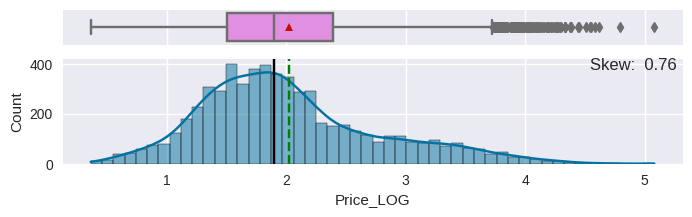

In [29]:
# Randomize data
data_copy3 = shuffle(data_copy2, random_state = 22)

# Log transform of target variable
data_copy3['Price_LOG'] = np.log(data_copy3['Price']+1)

y_log = data_copy3['Price_LOG']
y = data_copy3['Price']
X = data_copy3.drop(labels = ['Price_LOG', 'Price', 'Make', 'Model'], axis = 1)

X = pd.get_dummies(X,  columns = ['Fuel_Type', 'Transmission', 'Owner_Type', 'Location', 'Seats'], dtype = int, drop_first = True)

histogram_boxplot(data_copy3, 'Price_LOG', figsize = (8,2), bins = 50, kde = True)

# Section 4 #
## Modeling with Statsmodels to eliminate variables with high VIFs >5 and high p-value >0.5 ##
**In this sections the following steps will be carried out:**
- Initial modeling on training data (75% of the dataset) using statsmodels
- Systematic ellimination of varaibles with VIF>5 and p-values>0.5
- Analysis of assumptions of linear regression
- Correlation between predicted Price and actual Price for train, test, and total data set
- Analysis of the fit metrics at each step of the variable elimination
- K-fold cross-validation with 20 splits.  Statistics of fit metrics on train and validation data will be analyzed and average fit constants produced.


**Data preparation**
- Split into train and test data
- Standardized data using standardscalar.  Fit_transform train data, transform test data
- Convert back to dataframe
- Add fit constants

In [30]:
# Split into train and test data with 75% as train
X_train, X_test, y_train, y_test = train_test_split(X, y_log, test_size = .25, random_state = 22)

# Scale the predictors with standardscaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert to dataframes
X_train_scaled = pd.DataFrame(X_train_scaled, columns = X.columns, index = X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns = X.columns, index = X_test.index)

X_train_scaled = sm.add_constant(X_train_scaled, has_constant = 'add')
X_test_scaled = sm.add_constant(X_test_scaled, has_constant = 'add')

**Model using statsmodels**

                            OLS Regression Results                            
Dep. Variable:              Price_LOG   R-squared:                       0.908
Model:                            OLS   Adj. R-squared:                  0.907
Method:                 Least Squares   F-statistic:                     1415.
Date:                Thu, 15 Jun 2023   Prob (F-statistic):               0.00
Time:                        19:15:56   Log-Likelihood:                 315.03
No. Observations:                4473   AIC:                            -566.1
Df Residuals:                    4441   BIC:                            -361.1
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

,Seats_5.0,Seats_7.0,Fuel_Type_Petrol,Fuel_Type_Diesel,Seats_8.0
VIF,86.070,64.672,28.054,27.105,16.174
P values,0.038,0.326,0.321,0.000,0.408


,MAE,MAPE (%),RMSE,R-sq,R-sq adj,# of recores
Train1,0.166937,9.520267,0.225515,0.908052,0.907389,4473.0
Test1,0.164204,9.556934,0.214258,0.919520,0.917754,1491.0


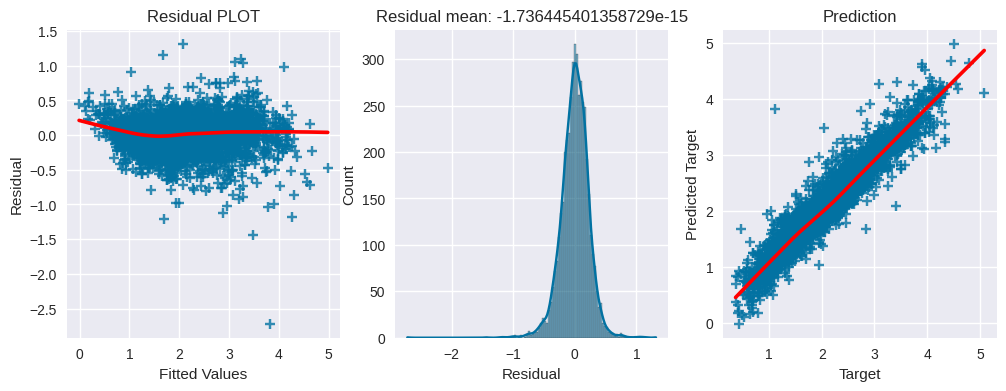

Goldfeld-Quandt Test:


,value
F statistic,0.941681
p-value,0.920829


In [31]:
# Run linear regression model
ols_model = sm.OLS(y_train, X_train_scaled)
ols_res = ols_model.fit()
print(ols_res.summary())

# Call functions to compute VIF, P-values
display(vif_pvalue(ols_res, X_train_scaled, y_train).head().T)

# Call function to compute and display fit-goodness values for train data and put into dataframe
summary_train = model_performance(ols_res, X_train_scaled, y_train)
summary_train.index = ['Train1']

# Call function to compute and display fit-goodness values for test data and put into dataframe
summary_test = model_performance(ols_res, X_test_scaled, y_test)
summary_test.index = ['Test1']

# Combine train and test data for display
summary = pd.concat([summary_train, summary_test])
display(summary)

# Call function for normality test
normality(ols_res, X_train_scaled, y_train)

**Observations**
- The initial model shows at this stage the assumptions of linear regression are satisfied.  
- There is multicolinearity evident as well as variables with low effect on the fit. 
- In following cells, variables with high VIF (>5) follwed by high p-values (>0.05) will be elliminated. 
- Assumptions of linear regression will be checked at the end.

**Systematic removal of variables with VIF>5 and P-values >0.5**

Remove Seats for highest VIF values >5

In [32]:
remove = 'Seats_5.0'
X_train_scaled.drop(labels = [remove], inplace = True, axis = 1)
X_test_scaled.drop(labels = [remove], inplace = True, axis = 1)

ols_model = sm.OLS(y_train, X_train_scaled)
ols_res = ols_model.fit()

metric_summ = vif_pvalue(ols_res, X_train_scaled, y_train)
display(metric_summ.head().T)
summary_train = model_performance(ols_res, X_train_scaled, y_train)
summary_train.index = ['Train2']
summary_test = model_performance(ols_res, X_test_scaled, y_test)
summary_test.index = ['Test2']
summary2 = pd.concat([summary_train, summary_test])
summary = pd.concat([summary, summary_train, summary_test])
display(summary2)

,Fuel_Type_Petrol,Fuel_Type_Diesel,Engine,Power,Location_Mumbai
VIF,28.052,27.093,9.609,8.465,4.088
P values,0.329,0.000,0.000,0.000,0.038


,MAE,MAPE (%),RMSE,R-sq,R-sq adj,# of recores
Train2,0.166773,9.512751,0.225624,0.907963,0.907320,4473.0
Test2,0.163750,9.539755,0.213570,0.920014,0.918315,1491.0


Remove Fuel_Type_Petrol for highest VIF >5

In [33]:
remove = 'Fuel_Type_Petrol'
X_train_scaled.drop(labels = [remove], inplace = True, axis = 1)
X_test_scaled.drop(labels = [remove], inplace = True, axis = 1)

ols_model = sm.OLS(y_train, X_train_scaled)
ols_res = ols_model.fit()

metric_summ = vif_pvalue(ols_res, X_train_scaled, y_train)
display(metric_summ.head().T)
summary_train = model_performance(ols_res, X_train_scaled, y_train)
summary_train.index = ['Train3']
summary_test = model_performance(ols_res, X_test_scaled, y_test)
summary_test.index = ['Test3']
summary3 = pd.concat([summary_train, summary_test])
summary = pd.concat([summary, summary_train, summary_test])
display(summary3)

,Engine,Power,Location_Mumbai,Location_Hyderabad,Location_Kochi
VIF,9.486,8.421,4.088,3.91,3.662
P values,0.000,0.000,0.038,0.00,0.163


,MAE,MAPE (%),RMSE,R-sq,R-sq adj,# of recores
Train3,0.166841,9.518964,0.225648,0.907943,0.907321,4473.0
Test3,0.163831,9.545551,0.213621,0.919974,0.918329,1491.0


Remove Engine for highest VIF >5

In [34]:
remove = 'Engine'
X_train_scaled.drop(labels = [remove], inplace = True, axis = 1)
X_test_scaled.drop(labels = [remove], inplace = True, axis = 1)

ols_model = sm.OLS(y_train, X_train_scaled)
ols_res = ols_model.fit()

metric_summ = vif_pvalue(ols_res, X_train_scaled, y_train)
display(metric_summ.head().T)
summary_train = model_performance(ols_res, X_train_scaled, y_train)
summary_train.index = ['Train4']
summary_test = model_performance(ols_res, X_test_scaled, y_test)
summary_test.index = ['Test4']
summary4 = pd.concat([summary_train, summary_test])
summary = pd.concat([summary, summary_train, summary_test])
display(summary4)

,Fuel_Type_LPG,Seats_4.0,Owner_Type_Fourth & Above,exotic,Location_Kochi
VIF,1.012,1.050,1.015,1.107,3.662
P values,0.758,0.646,0.579,0.473,0.230


,MAE,MAPE (%),RMSE,R-sq,R-sq adj,# of recores
Train4,0.170153,9.687426,0.228876,0.905290,0.904672,4473.0
Test4,0.166458,9.614033,0.216286,0.917919,0.916290,1491.0


Remove Fuel_Type_LPG for highest p_value >0.05

In [35]:
remove = 'Fuel_Type_LPG'
X_train_scaled.drop(labels = [remove], inplace = True, axis = 1)
X_test_scaled.drop(labels = [remove], inplace = True, axis = 1)

ols_model = sm.OLS(y_train, X_train_scaled)
ols_res = ols_model.fit()

metric_summ = vif_pvalue(ols_res, X_train_scaled, y_train)
display(metric_summ.head().T)
summary_train = model_performance(ols_res, X_train_scaled, y_train)
summary_train.index = ['Train5']
summary_test = model_performance(ols_res, X_test_scaled, y_test)
summary_test.index = ['Test5']
summary5 = pd.concat([summary_train, summary_test])
summary = pd.concat([summary, summary_train, summary_test])
display(summary5)

,Seats_4.0,Owner_Type_Fourth & Above,exotic,Location_Kochi,Location_Pune
VIF,1.050,1.015,1.107,3.662,3.560
P values,0.648,0.580,0.472,0.230,0.194


,MAE,MAPE (%),RMSE,R-sq,R-sq adj,# of recores
Train5,0.170157,9.687896,0.228878,0.905288,0.904692,4473.0
Test5,0.166454,9.613555,0.216284,0.917918,0.916346,1491.0


Remove Seats_4.0 for highest p_value >0.05

In [36]:
remove = 'Seats_4.0'
X_train_scaled.drop(labels = [remove], inplace = True, axis = 1)
X_test_scaled.drop(labels = [remove], inplace = True, axis = 1)

ols_model = sm.OLS(y_train, X_train_scaled)
ols_res = ols_model.fit()

metric_summ = vif_pvalue(ols_res, X_train_scaled, y_train)
display(metric_summ.head().T)
summary_train = model_performance(ols_res, X_train_scaled, y_train)
summary_train.index = ['Train6']
summary_test = model_performance(ols_res, X_test_scaled, y_test)
summary_test.index = ['Test6']
summary6 = pd.concat([summary_train, summary_test])
summary = pd.concat([summary, summary_train, summary_test])
display(summary6)

,Owner_Type_Fourth & Above,exotic,Location_Kochi,Location_Pune,Seats_9.0
VIF,1.015,1.104,3.661,3.560,1.008
P values,0.578,0.459,0.232,0.193,0.185


,MAE,MAPE (%),RMSE,R-sq,R-sq adj,# of recores
Train6,0.17013,9.682807,0.228884,0.905284,0.904709,4473.0
Test6,0.16637,9.603146,0.216157,0.918011,0.916498,1491.0


Remove Owner_Type_Fourth & Above for highest p_value >0.05

In [37]:
remove = 'Owner_Type_Fourth & Above'
X_train_scaled.drop(labels = [remove], inplace = True, axis = 1)
X_test_scaled.drop(labels = [remove], inplace = True, axis = 1)

ols_model = sm.OLS(y_train, X_train_scaled)
ols_res = ols_model.fit()

metric_summ = vif_pvalue(ols_res, X_train_scaled, y_train)
display(metric_summ.head().T)
summary_train = model_performance(ols_res, X_train_scaled, y_train)
summary_train.index = ['Train7']
summary_test = model_performance(ols_res, X_test_scaled, y_test)
summary_test.index = ['Test7']
summary7 = pd.concat([summary_train, summary_test])
summary = pd.concat([summary, summary_train, summary_test])
display(summary7)

,exotic,Location_Kochi,Location_Pune,Seats_9.0,Location_Delhi
VIF,1.104,3.661,3.559,1.008,3.201
P values,0.456,0.234,0.197,0.184,0.120


,MAE,MAPE (%),RMSE,R-sq,R-sq adj,# of recores
Train7,0.170116,9.681045,0.228892,0.905277,0.904723,4473.0
Test7,0.166439,9.608484,0.216208,0.917975,0.916518,1491.0


Remove exotic for highest p_value >0.05

In [38]:
remove = 'exotic'
X_train_scaled.drop(labels = [remove], inplace = True, axis = 1)
X_test_scaled.drop(labels = [remove], inplace = True, axis = 1)

ols_model = sm.OLS(y_train, X_train_scaled)
ols_res = ols_model.fit()

metric_summ = vif_pvalue(ols_res, X_train_scaled, y_train)
display(metric_summ.head().T)
summary_train = model_performance(ols_res, X_train_scaled, y_train)
summary_train.index = ['Train8']
summary_test = model_performance(ols_res, X_test_scaled, y_test)
summary_test.index = ['Test8']
summary8 = pd.concat([summary_train, summary_test])
summary = pd.concat([summary, summary_train, summary_test])
display(summary8)

,Location_Kochi,Location_Pune,Seats_9.0,Location_Delhi,Location_Jaipur
VIF,3.661,3.559,1.008,3.201,2.723
P values,0.232,0.197,0.185,0.122,0.067


,MAE,MAPE (%),RMSE,R-sq,R-sq adj,# of recores
Train8,0.170081,9.678080,0.228906,0.905265,0.904733,4473.0
Test8,0.166436,9.605909,0.216229,0.917964,0.916564,1491.0


Remove Location_Kochi for highest p_value >0.05

In [39]:
remove = 'Location_Kochi'
X_train_scaled.drop(labels = [remove], inplace = True, axis = 1)
X_test_scaled.drop(labels = [remove], inplace = True, axis = 1)

ols_model = sm.OLS(y_train, X_train_scaled)
ols_res = ols_model.fit()

metric_summ = vif_pvalue(ols_res, X_train_scaled, y_train)
display(metric_summ.head().T)
summary_train = model_performance(ols_res, X_train_scaled, y_train)
summary_train.index = ['Train9']
summary_test = model_performance(ols_res, X_test_scaled, y_test)
summary_test.index = ['Test9']
summary9 = pd.concat([summary_train, summary_test])
summary = pd.concat([summary, summary_train, summary_test])
display(summary9)

,Location_Pune,Location_Delhi,Seats_9.0,Location_Jaipur,Location_Mumbai
VIF,1.646,1.505,1.008,1.433,1.704
P values,0.541,0.323,0.185,0.163,0.130


,MAE,MAPE (%),RMSE,R-sq,R-sq adj,# of recores
Train9,0.170154,9.679285,0.228943,0.905235,0.904724,4473.0
Test9,0.166491,9.606082,0.216324,0.917892,0.916548,1491.0


Remove Location_Pune for highest p_value >0.05

In [40]:
remove = 'Location_Pune'
X_train_scaled.drop(labels = [remove], inplace = True, axis = 1)
X_test_scaled.drop(labels = [remove], inplace = True, axis = 1)

ols_model = sm.OLS(y_train, X_train_scaled)
ols_res = ols_model.fit()

metric_summ = vif_pvalue(ols_res, X_train_scaled, y_train)
display(metric_summ.head().T)
summary_train = model_performance(ols_res, X_train_scaled, y_train)
summary_train.index = ['Train10']
summary_test = model_performance(ols_res, X_test_scaled, y_test)
summary_test.index = ['Test10']
summary10 = pd.concat([summary_train, summary_test])
summary = pd.concat([summary, summary_train, summary_test])
display(summary10)

,Location_Delhi,Location_Jaipur,Seats_9.0,Location_Mumbai,Seats_10.0
VIF,1.251,1.208,1.008,1.365,1.016
P values,0.418,0.209,0.185,0.165,0.001


,MAE,MAPE (%),RMSE,R-sq,R-sq adj,# of recores
Train10,0.170187,9.683337,0.228952,0.905227,0.904737,4473.0
Test10,0.166473,9.607925,0.216364,0.917866,0.916579,1491.0


Remove Location_Delhi for highest p_value >0.05

In [41]:
remove = 'Location_Delhi'
X_train_scaled.drop(labels = [remove], inplace = True, axis = 1)
X_test_scaled.drop(labels = [remove], inplace = True, axis = 1)

ols_model = sm.OLS(y_train, X_train_scaled)
ols_res = ols_model.fit()

metric_summ = vif_pvalue(ols_res, X_train_scaled, y_train)
display(metric_summ.head().T)
summary_train = model_performance(ols_res, X_train_scaled, y_train)
summary_train.index = ['Train11']
summary_test = model_performance(ols_res, X_test_scaled, y_test)
summary_test.index = ['Test11']
summary11 = pd.concat([summary_train, summary_test])
summary = pd.concat([summary, summary_train, summary_test])
display(summary11)

,Location_Jaipur,Location_Mumbai,Seats_9.0,Owner_Type_Third,Seats_10.0
VIF,1.142,1.235,1.008,1.096,1.016
P values,0.273,0.231,0.185,0.002,0.001


,MAE,MAPE (%),RMSE,R-sq,R-sq adj,# of recores
Train11,0.170267,9.689586,0.228969,0.905213,0.904745,4473.0
Test11,0.166570,9.617256,0.216467,0.917786,0.916554,1491.0


Remove Location_Jaipur for highest p_value >0.05

In [42]:
remove = 'Location_Jaipur'
X_train_scaled.drop(labels = [remove], inplace = True, axis = 1)
X_test_scaled.drop(labels = [remove], inplace = True, axis = 1)

ols_model = sm.OLS(y_train, X_train_scaled)
ols_res = ols_model.fit()

metric_summ = vif_pvalue(ols_res, X_train_scaled, y_train)
display(metric_summ.head().T)
summary_train = model_performance(ols_res, X_train_scaled, y_train)
summary_train.index = ['Train12']
summary_test = model_performance(ols_res, X_test_scaled, y_test)
summary_test.index = ['Test12']
summary12 = pd.concat([summary_train, summary_test])
summary = pd.concat([summary, summary_train, summary_test])
display(summary12)

,Location_Mumbai,Seats_9.0,Seats_10.0,Owner_Type_Third,Location_Chennai
VIF,1.188,1.008,1.015,1.096,1.132
P values,0.315,0.186,0.001,0.001,0.000


,MAE,MAPE (%),RMSE,R-sq,R-sq adj,# of recores
Train12,0.170286,9.692618,0.22900,0.905188,0.904740,4473.0
Test12,0.166509,9.612938,0.21638,0.917850,0.916675,1491.0


Remove Location_Mumbai for highest p_value >0.05

In [43]:
remove = 'Location_Mumbai'
X_train_scaled.drop(labels = [remove], inplace = True, axis = 1)
X_test_scaled.drop(labels = [remove], inplace = True, axis = 1)

ols_model = sm.OLS(y_train, X_train_scaled)
ols_res = ols_model.fit()

metric_summ = vif_pvalue(ols_res, X_train_scaled, y_train)
display(metric_summ.head().T)
summary_train = model_performance(ols_res, X_train_scaled, y_train)
summary_train.index = ['Train13']
summary_test = model_performance(ols_res, X_test_scaled, y_test)
summary_test.index = ['Test13']
summary13 = pd.concat([summary_train, summary_test])
summary = pd.concat([summary, summary_train, summary_test])
display(summary13)

,Seats_9.0,Owner_Type_Third,Seats_10.0,Location_Chennai,Seats_8.0
VIF,1.008,1.095,1.015,1.096,1.18
P values,0.184,0.002,0.001,0.000,0.00


,MAE,MAPE (%),RMSE,R-sq,R-sq adj,# of recores
Train13,0.170331,9.694994,0.229026,0.905166,0.904740,4473.0
Test13,0.166521,9.618211,0.216469,0.917783,0.916665,1491.0


Remove Seats_9.0 for highest p_value >0.05

In [44]:
remove = 'Seats_9.0'
X_train_scaled.drop(labels = [remove], inplace = True, axis = 1)
X_test_scaled.drop(labels = [remove], inplace = True, axis = 1)

ols_model = sm.OLS(y_train, X_train_scaled)
ols_res = ols_model.fit()

metric_summ = vif_pvalue(ols_res, X_train_scaled, y_train)
display(metric_summ.head().T)
summary_train = model_performance(ols_res, X_train_scaled, y_train)
summary_train.index = ['Train14']
summary_test = model_performance(ols_res, X_test_scaled, y_test)
summary_test.index = ['Test14']
summary14 = pd.concat([summary_train, summary_test])
summary = pd.concat([summary, summary_train, summary_test])
display(summary14)

,Owner_Type_Third,Seats_10.0,Mileage,Location_Chennai,Seats_8.0
VIF,1.095,1.015,2.268,1.094,1.179
P values,0.002,0.001,0.000,0.000,0.000


,MAE,MAPE (%),RMSE,R-sq,R-sq adj,# of recores
Train14,0.170333,9.693787,0.229071,0.905128,0.904724,4473.0
Test14,0.166395,9.609369,0.216259,0.917938,0.916878,1491.0


**Observations**
- 14 variables have been removed
- All remaining variables have VIF<5 and p-values<0.5

## Test normality on final model ##

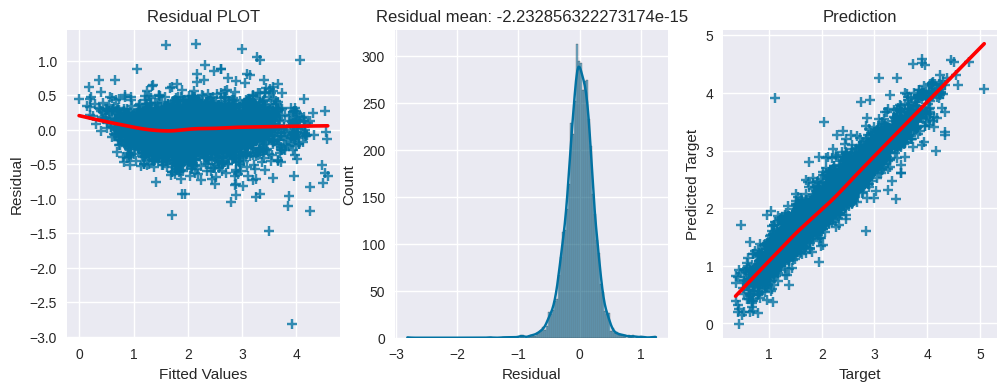

Goldfeld-Quandt Test:


,value
F statistic,0.936928
p-value,0.937441


In [45]:
normality(ols_res, X_train_scaled, y_train)

**Results of normality test**
- The residuals are randomly distributed with no patter
- The p-value of the Goldfeld-Quandt test is 0.94.  The null hypothesis of homoscedasticity cannot be rejected.
- The distribution of the residuals in normal and the mean is zero.
- The predicted target (log transformed) vs the actual target (log transformed) is linear
##

**Examine the Fit metrics and plot R-sq and MAE for each iteration of the model**



Fit metrics for train data for each modeling interation:


,MAE,MAPE (%),RMSE,R-sq,R-sq adj,# of recores
Train1,0.166937,9.520267,0.225515,0.908052,0.907389,4473.0
Train2,0.166773,9.512751,0.225624,0.907963,0.907320,4473.0
Train3,0.166841,9.518964,0.225648,0.907943,0.907321,4473.0
Train4,0.170153,9.687426,0.228876,0.905290,0.904672,4473.0
Train5,0.170157,9.687896,0.228878,0.905288,0.904692,4473.0
Train6,0.170130,9.682807,0.228884,0.905284,0.904709,4473.0
Train7,0.170116,9.681045,0.228892,0.905277,0.904723,4473.0
Train8,0.170081,9.678080,0.228906,0.905265,0.904733,4473.0
Train9,0.170154,9.679285,0.228943,0.905235,0.904724,4473.0
Train10,0.170187,9.683337,0.228952,0.905227,0.904737,4473.0




Fit metrics for test data for each modeling interation:


,MAE,MAPE (%),RMSE,R-sq,R-sq adj,# of recores
Test1,0.164204,9.556934,0.214258,0.919520,0.917754,1491.0
Test2,0.163750,9.539755,0.213570,0.920014,0.918315,1491.0
Test3,0.163831,9.545551,0.213621,0.919974,0.918329,1491.0
Test4,0.166458,9.614033,0.216286,0.917919,0.916290,1491.0
Test5,0.166454,9.613555,0.216284,0.917918,0.916346,1491.0
Test6,0.166370,9.603146,0.216157,0.918011,0.916498,1491.0
Test7,0.166439,9.608484,0.216208,0.917975,0.916518,1491.0
Test8,0.166436,9.605909,0.216229,0.917964,0.916564,1491.0
Test9,0.166491,9.606082,0.216324,0.917892,0.916548,1491.0
Test10,0.166473,9.607925,0.216364,0.917866,0.916579,1491.0


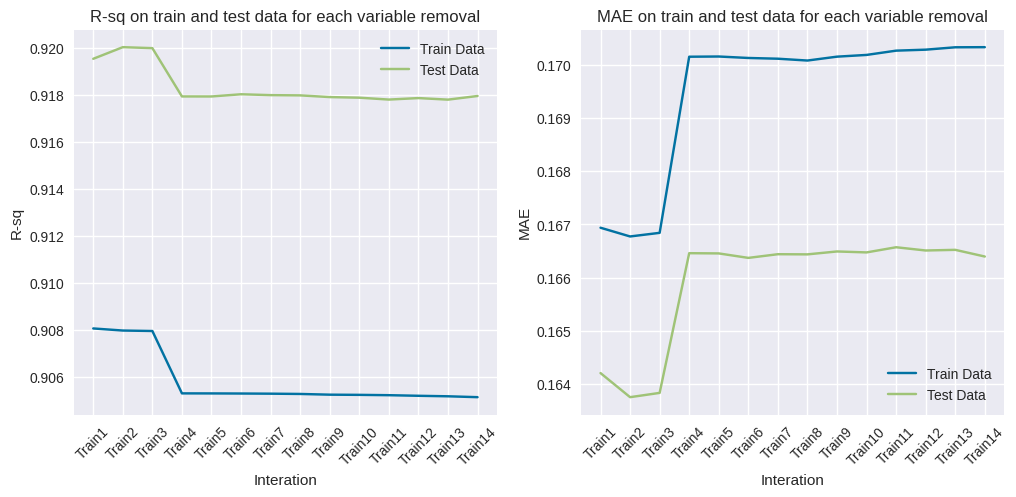

In [46]:
# Seperate train and test data and plot vs iteration
trials = summary.iloc[:-1:2]
tests = summary.iloc[1::2]

# Display train and test metrics for each iteration of modeling
print('\n\nFit metrics for train data for each modeling interation:')
display(trials)
print('\n\nFit metrics for test data for each modeling interation:')
display(tests)

# Define subplots
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Plot train and test data R-sq on same axis
ax[0].plot(trials.index, trials['R-sq'])
ax[0].plot(trials.index, tests['R-sq'])
ax[0].legend(['Train Data', 'Test Data'])
ax[0].set_xlabel('Interation')
ax[0].set_ylabel('R-sq')
ax[0].set_title('R-sq on train and test data for each variable removal')
ax[0].tick_params(axis = 'x', rotation = 45)


# Plot MAE for train and validation data for each fold on same axis
ax[1].plot(trials.index, trials['MAE'])
ax[1].plot(trials.index, tests['MAE'])
ax[1].legend(['Train Data', 'Test Data'])
ax[1].set_xlabel('Interation')
ax[1].set_ylabel('MAE')
ax[1].set_title('MAE on train and test data for each variable removal')
ax[1].tick_params(axis = 'x', rotation = 45)
plt.show()

**Observations**
- There is a consistent offset between Train and Test data
- Test data is has lower R-sq the the train data which may indicate overfitting.  The difference is small however and kfold cross-validation is necessary to confirm.
- There was a noticable drop in the fit quality when 'engine' was removed for the fit variables for a high VIF.  This drop is small however.
##

**Check predictive power of the model**

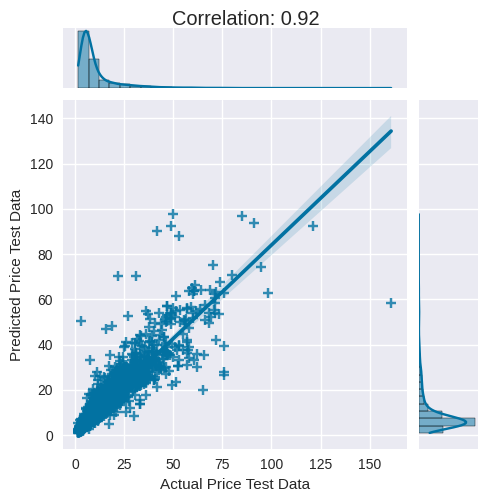

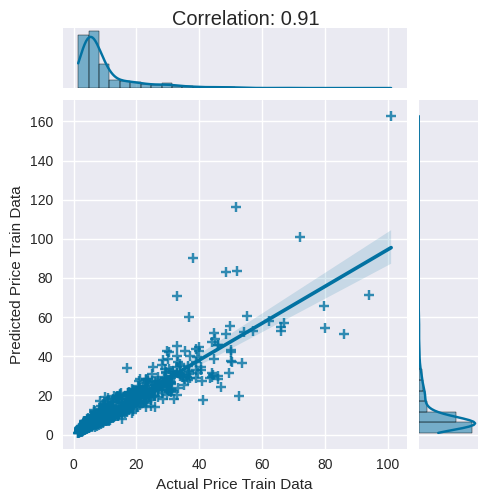



The fit metrics for the predicted of the test data are (reverse transformed):


,MAE,MAPE (%),RMSE,R-sq,R-sq adj,# of recores
0,1.990724,17.018123,4.648911,0.8281,0.82588,1491.0


In [47]:
# Reverse transform of predicted and actual MEDV train data
y_pred = (np.exp(ols_res.fittedvalues))
y_actual = np.exp(y_train)
y_test_pred = np.exp(ols_res.predict(X_test_scaled))
y_test_actual = np.exp(y_test)

#Place in dataframes
prediction_train = pd.concat([y_pred, y_actual], axis = 1)
prediction_train.columns = ['y_prediction', 'y_actual']
prediction_test = pd.concat([y_test_pred, y_test_actual], axis = 1)
prediction_test.columns = ['y_prediction', 'y_actual']

# Plot predicted MEDV vs Actual MEDV for train data
sns.jointplot(data = prediction_train, y = 'y_prediction', x = 'y_actual', kind='reg', marginal_kws=dict(bins=30), height = 5, marker = '+')
cor = round(prediction_train['y_prediction'].corr(prediction_train['y_actual']), 2)
plt.suptitle('Correlation: ' + str(cor), y=1)
plt.xlabel('Actual Price Test Data')
plt.ylabel('Predicted Price Test Data')
plt.show()

# Plot predicted MEDV vs Actual MEDV for train data
sns.jointplot(data = prediction_test, y = 'y_prediction', x = 'y_actual', kind='reg', marginal_kws=dict(bins=30), height = 5, marker = '+')
cor = round(prediction_test['y_prediction'].corr(prediction_test['y_actual']), 2)
plt.suptitle('Correlation: ' + str(cor), y=1)
plt.xlabel('Actual Price Train Data')
plt.ylabel('Predicted Price Train Data')
plt.show()

summary = pd.DataFrame()
# Caluclate fit metrics of un-transformed target variable Price for test data
# Compute R_sq
R_sq = cor**2
target = y_test_actual
y_pred = y_test_pred
# Compute R-squared adjusted
R_sq_adj = 1-(1-R_sq)*(X_test_scaled.shape[0]-1)/(X_test_scaled.shape[0]-X_test_scaled.shape[1]-1)
    
# Put fit evaluation parameters into data frame
summary.loc[0, 'MAE'] = np.abs(y_pred - target).mean()
summary.loc[0,'MAPE (%)']  = (np.abs((y_pred - target)/target).mean()*100)
summary.loc[0,'RMSE']  = (np.sqrt(np.mean(np.square(y_pred - target))))
summary.loc[0,'R-sq'] = R_sq
summary.loc[0,'R-sq adj'] = R_sq_adj
summary.loc[0, '# of recores'] = len(target)

print('\n\nThe fit metrics for the predicted of the test data are (reverse transformed):')
summary

**Observation**
- The predictions of the test and train data correlate well with the actual data with correlations above 0.9
- The MAE of the price is 1.99
##

## Perform k-fold cross-validation using the final model from above ##

Prepare data

In [48]:
# Filter original X data by columns remaining in final X_train_scaled data for use in kfold cross validation
cols = X_train_scaled.columns
cols = cols.drop(['const'])  #Drop constant because scikit learn doesn't need
X = X[cols]  #Filter by cols from final model
# Convert X and y to numpy arrays
X_array = X.to_numpy()
y_array = y_log.to_numpy()

**Model using KFOLD for cross-validation with 20 splits**
- Fit metrics for each fold are saved in a dataframe and displayed at the end
- Summary statics of the fitting constants for each fold are displayed
- Plots of the R-sq and MSE for train and test data are displayed



Statistics for goodness of fit on train data:


,count,mean,std,min,25%,50%,75%,max
MAE,20.0,0.169244,0.000399,0.168353,0.168986,0.169340,0.169467,0.169936
MAPE (%),20.0,9.666006,0.035804,9.605079,9.633312,9.669707,9.694508,9.724562
RMSE,20.0,0.225742,0.000960,0.223088,0.225431,0.225990,0.226320,0.226903
R-sq,20.0,0.908511,0.000743,0.907388,0.908248,0.908426,0.908742,0.911009
R-sq adj,20.0,0.908219,0.000745,0.907092,0.907956,0.908134,0.908451,0.910725
# of recores,20.0,5665.800000,0.410391,5665.000000,5666.000000,5666.000000,5666.000000,5666.000000




Statistics for goodness of fit on test data:


,count,mean,std,min,25%,50%,75%,max
MAE,20.0,0.170084,0.007605,0.155874,0.165221,0.169542,0.175051,0.188125
MAPE (%),20.0,9.714658,0.704103,8.487414,9.141329,9.662298,10.429704,10.774950
RMSE,20.0,0.226512,0.017316,0.203584,0.216039,0.222135,0.232915,0.272714
R-sq,20.0,0.907673,0.014448,0.858509,0.903157,0.909211,0.913961,0.927602
R-sq adj,20.0,0.901721,0.015374,0.849413,0.896910,0.903364,0.908410,0.922931
# of recores,20.0,298.200000,0.410391,298.000000,298.000000,298.000000,298.000000,299.000000


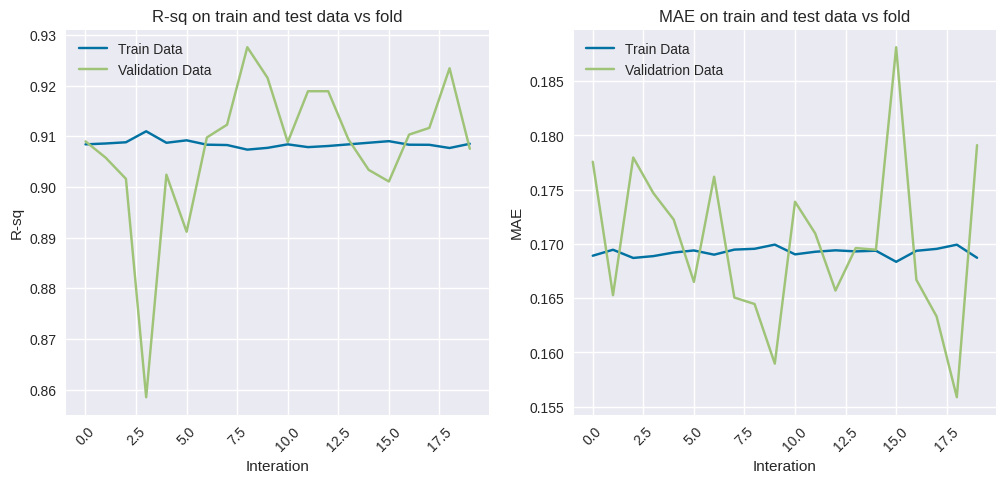

In [49]:
#initialize some dataframes and other things
summary_train = pd.DataFrame()
summary_test = pd.DataFrame()
coefficients = pd.DataFrame(columns = X.columns)

# Initialize model
regressor = LinearRegression(fit_intercept = True)

# Initialize KFolds for 20 splits
kf = KFold(n_splits = 20, random_state = 1, shuffle = True)

# Create kfold splits object
data_splits_obj = kf.split(X_array, y_array)

# Loop through the folds
for train_index, test_index in data_splits_obj:
    
    # Filter train and test data for each loop from data
    x_train = X_array[train_index]
    y_train = y_array[train_index]
    x_test = X_array[test_index]
    y_test = y_array[test_index]
    
    # Apply scalertransform
    x_train_scale = scaler.fit_transform(x_train)
    x_test_scale = scaler.transform(x_test)

    # Fit data
    model = regressor.fit(x_train_scale, y_train)
    
    # Collect performance metrics and coefficients for each fold into dataframes
    per_train = model_performance(model, x_train_scale, y_train)
    summary_train = pd.concat([summary_train, per_train], axis = 0, ignore_index = True)
    
    per_test = model_performance(model, x_test_scale, y_test)
    summary_test = pd.concat([summary_test, per_test], axis = 0, ignore_index = True)
    coefficients = pd.concat([coefficients, pd.DataFrame(np.atleast_2d(model.coef_), columns = cols)],
                             axis = 0, ignore_index = True)
    
print('\n\nStatistics for goodness of fit on train data:')
display(summary_train.describe().T)
 
print('\n\nStatistics for goodness of fit on test data:')
display(summary_test.describe().T)                             

# Define subplots
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Plot train and test data R-sq on same axis
ax[0].plot(summary_train.index, summary_train['R-sq'])
ax[0].plot(summary_train.index, summary_test['R-sq'])
ax[0].legend(['Train Data', 'Validation Data'])
ax[0].set_xlabel('Interation')
ax[0].set_ylabel('R-sq')
ax[0].set_title('R-sq on train and test data vs fold')
ax[0].tick_params(axis = 'x', rotation = 45)


# Plot MAE for train and validation data for each fold on same axis
ax[1].plot(summary_train.index, summary_train['MAE'])
ax[1].plot(summary_train.index, summary_test['MAE'])
ax[1].legend(['Train Data', 'Validatrion Data'])
ax[1].set_xlabel('Interation')
ax[1].set_ylabel('MAE')
ax[1].set_title('MAE on train and test data vs fold')
ax[1].tick_params(axis = 'x', rotation = 45)
plt.show()

**Observations**
- Performing 20-fold cross-validation gives and average R-sq for the train data of .909 and an average R-sq for the validation data of .908.  The model is not overfitting and train and validation data are performing similarly
- R-sq for the validation data has a higher variation with a std 20x larger than the train data.  This is to be expected due to the smaller validation data size.
##

**Examine fit Coefficients**



Fit coefficients:


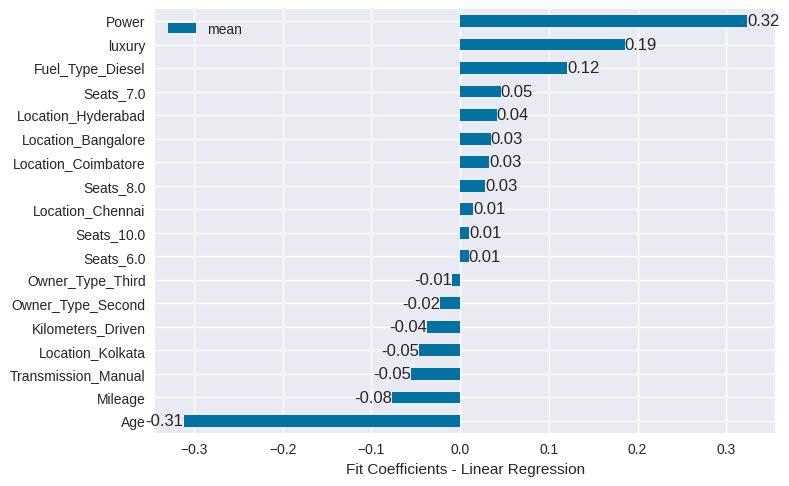

In [50]:
# Prepare coefficient statistics
coeff_stats = coefficients.describe().T
coeff_stats = coeff_stats.reindex(coeff_stats['mean'].sort_values(ascending = True).index)

# Plot fit constants
print('\n\nFit coefficients:')
ax = coeff_stats.plot(y='mean', kind = 'barh')
ax.bar_label(ax.containers[0], fmt='%1.2f')
ax.set_xlabel('Fit Coefficients - Linear Regression')
plt.show()

**Observatrions**
- The fit coefficients are given in the table and plot above.
- The top 3 positive influencers on price are Power, luxury, and Fuel_Type_Diesel.  This makes sense.
- The top 3 negative influencers on priced are Age, Mileage, and Transmission_Manual with Age exceeding the other tw by over a factor of 3.  This also makes sense.

# Section 5 #
## In this section, Random Forrest regression using the manually imputed and reduced dataset from above will be tested ##

**Model using RandomForrestRegressor from Skikit-learn with hyperparameter tuning using GridSearchCV and kfold cross-validation**
- Gridsearchcv is used for hyperparameter tuning
- Pipeline will be used.  This will allow scaling during the gridsearchcv validation to be applied seperately between train and validation data so as to avoid data-leakage.
- The imputation of the data was done manually previously and train and test data were not done seperately.  Idealy these would be done seperately with fit_transform applied to train data and transform applied to the validation data.  This is difficult with manual imputation.  In the next section, imputation using KNNImputer will be performed to solve this problem.
- The final data from the linear regression above will also be used (ie variables with high VIF's an p-values eliminated).

In [51]:
# Create a KFold cross-validation object
kf = KFold(n_splits=5, shuffle=True, random_state=1)

# Initialize KNNImputer, Standardscaler, and RandomForestRegressor
scalar = StandardScaler()
regressor = RFR(random_state=1)

# StandardScaler, and RandomForestRegressor
pipeline = Pipeline([
    ('scaler', scaler),
    ('regressor', regressor)
])

# Define the parameter grid for GridSearchCV
param_grid = {
    'regressor__n_estimators': [600, 650, 700],
    'regressor__min_samples_split': [2, 3, 4]
}

# Create a GridSearchCV object with estimator = pipeline, crossfold = kf, refit = false
grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=kf, n_jobs=-2, scoring = 'r2')

# Fit using gridsearch
model = grid_search.fit(X_array, y_array)

# Extract the best hyperparameters
best_params = model.best_params_

# Print parameters and best R squared on validation data
print("Best parameters:", best_params)
print("Best score:", grid_search.best_score_)

Best parameters: {'regressor__min_samples_split': 3, 'regressor__n_estimators': 650}
Best score: 0.9430703270746562


**Observations**
- The cross-validation score using the best hyperparameters is 0.943 (R-sq)
- The best parameters are given

**Model**
- The parameters from above will be used with explicit k-fold cross-validation to collect all fit metrics for comparison

In [52]:
summary_train = pd.DataFrame()
summary_test = pd.DataFrame()

# Create a new pipeline with the best parameters for use in explicit k-fold cross-validation
best_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', RFR(n_estimators=best_params['regressor__n_estimators'], 
                      min_samples_split=best_params['regressor__min_samples_split'], random_state=1))
])

# Perform k-fold cross-validation with the best pipeline
for fold, (train_index, test_index) in enumerate(kf.split(X_array)):
    X_train, X_test = X_array[train_index], X_array[test_index]
    y_train, y_test = y_array[train_index], y_array[test_index]

    # Fit the best pipeline on the training data
    model = best_pipeline.fit(X_train, y_train)
    
    # Collect performance for each fold using model = grid_search.best_estimator_
    # Place into dataframes for train data
    per_train = model_performance(model, X_train, y_train)
    summary_train = pd.concat([summary_train, per_train], axis = 0, ignore_index = True)

    # Collect performance for each fold using model =  grid_search.best_estimator_
    # Place into dataframes for train data
    per_test = model_performance(model, X_test, y_test)
    summary_test = pd.concat([summary_test, per_test], axis = 0, ignore_index = True)

# Print the summary dataframes and scores dataframe
print("\n\nSummary - Train Data:")
display(summary_train.describe().T)
print("\n\nSummary - Test Data:")
display(summary_test.describe().T)  



Summary - Train Data:


,count,mean,std,min,25%,50%,75%,max
MAE,5.0,0.049344,0.000482,0.048778,0.048865,0.049639,0.049644,0.049792
MAPE (%),5.0,2.810711,0.045532,2.756249,2.779245,2.805551,2.847274,2.865235
RMSE,5.0,0.071313,0.002138,0.067730,0.070922,0.072504,0.072705,0.072706
R-sq,5.0,0.991109,0.000534,0.990579,0.990894,0.990909,0.991178,0.991987
R-sq adj,5.0,0.991076,0.000537,0.990543,0.990859,0.990875,0.991144,0.991957
# of recores,5.0,4771.200000,0.447214,4771.000000,4771.000000,4771.000000,4771.000000,4772.000000




Summary - Test Data:


,count,mean,std,min,25%,50%,75%,max
MAE,5.0,0.123631,0.003069,0.120317,0.121156,0.123234,0.125917,0.127529
MAPE (%),5.0,7.027994,0.348912,6.612539,6.734191,7.143505,7.186261,7.463476
RMSE,5.0,0.177305,0.013618,0.164645,0.168148,0.174644,0.179774,0.199316
R-sq,5.0,0.943361,0.009569,0.928510,0.941276,0.943787,0.950042,0.953188
R-sq adj,5.0,0.942492,0.009716,0.927414,0.940376,0.942925,0.949276,0.952470
# of recores,5.0,1192.800000,0.447214,1192.000000,1193.000000,1193.000000,1193.000000,1193.000000


**Observations**

**Observations**
- The R-sq averaged over the training data is .991 and the MAE is 0.049
- The R-sq averaged over the validation data is .943 and the MAE is 0.124
- This suggests a slight amount of overfitting but the result on the validation data is superior to the result from linear regression

**Analyze fit metrics and residuals**

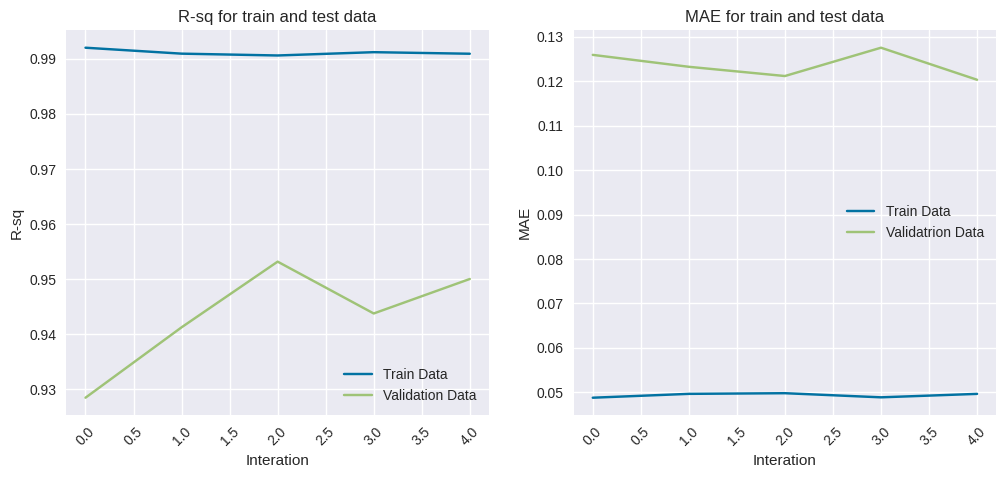

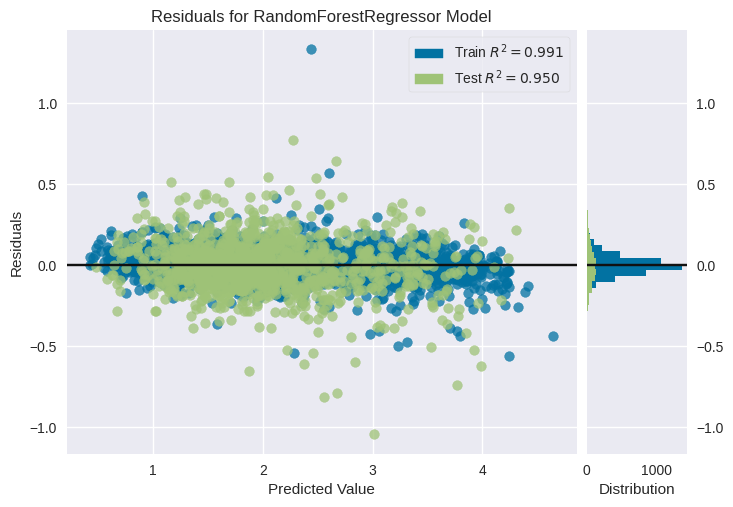

<Axes: title={'center': 'Residuals for RandomForestRegressor Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [53]:
# Define subplots
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Plot train and test data R-sq on same axis
ax[0].plot(summary_train.index, summary_train['R-sq'])
ax[0].plot(summary_train.index, summary_test['R-sq'])
ax[0].legend(['Train Data', 'Validation Data'])
ax[0].set_xlabel('Interation')
ax[0].set_ylabel('R-sq')
ax[0].set_title('R-sq for train and test data')
ax[0].tick_params(axis = 'x', rotation = 45)


# Plot MAE for train and validation data for each fold on same axis
ax[1].plot(summary_train.index, summary_train['MAE'])
ax[1].plot(summary_train.index, summary_test['MAE'])
ax[1].legend(['Train Data', 'Validatrion Data'])
ax[1].set_xlabel('Interation')
ax[1].set_ylabel('MAE')
ax[1].set_title('MAE for train and test data')
ax[1].tick_params(axis = 'x', rotation = 45)
plt.show()
print('\n\n')

# Yellowbrick visualizer of residual for train and test data from the last fold from above
visualizer = ResidualsPlot(model)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

**Observations**
- R-sq on the validation data ranges from .93 to slightly over .95

**Correlation plot for last set of train and validation data and total data**

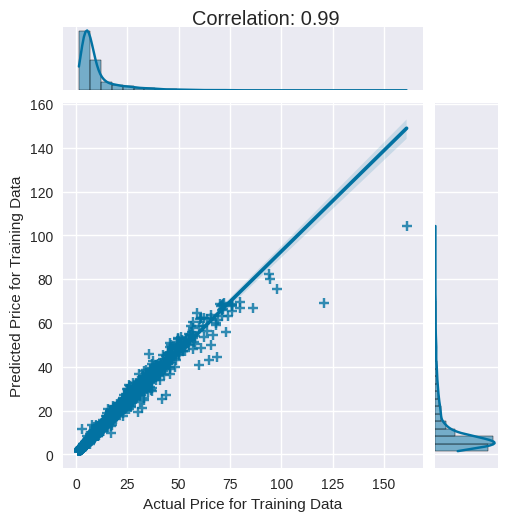

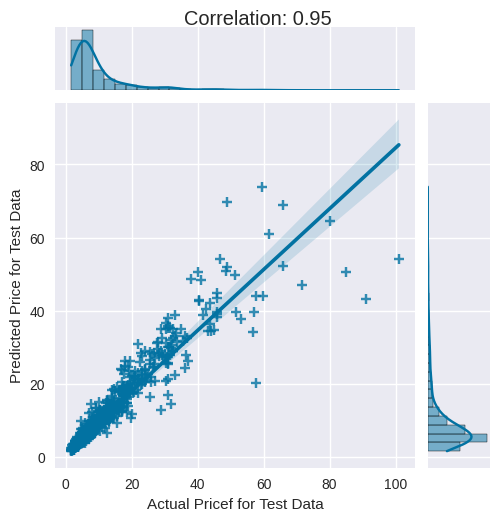



The fit metrics for the predicted of the test data are (reverse transformed):


,MAE,MAPE (%),RMSE,R-sq,R-sq adj,# of recores
0,1.44593,12.112291,3.615472,0.9025,0.901004,1192.0


In [54]:
y_pred = np.exp(model.predict(X_train))
cor = round(np.corrcoef(y_pred,np.exp(y_train))[0,1],2)
sns.jointplot(y = y_pred, x = np.exp(y_train), kind='reg', marginal_kws=dict(bins=30), height = 5, marker = '+')
plt.suptitle('Correlation: ' + str(cor), y=1)
plt.xlabel('Actual Price for Training Data')
plt.ylabel('Predicted Price for Training Data')
plt.show()

y_pred = np.exp(model.predict(X_test))
cor = round(np.corrcoef(y_pred,np.exp(y_test))[0,1],2)
sns.jointplot(y = y_pred, x = np.exp(y_test), kind='reg', marginal_kws=dict(bins=30), height = 5, marker = '+')
plt.suptitle('Correlation: ' + str(cor), y=1)
plt.xlabel('Actual Pricef for Test Data')
plt.ylabel('Predicted Price for Test Data')
plt.show()


summary = pd.DataFrame()

R_sq = cor**2
target = np.exp(y_test)   
# Compute R-squared adjusted
R_sq_adj = 1-(1-R_sq)*(X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)
    
# Put fit evaluation parameters into data frame
summary = pd.DataFrame()
summary.loc[0, 'MAE'] = np.abs(y_pred - target).mean()
summary.loc[0,'MAPE (%)']  = (np.abs((y_pred - target)/target).mean()*100)
summary.loc[0,'RMSE']  = (np.sqrt(np.mean(np.square(y_pred - target))))
summary.loc[0,'R-sq'] = R_sq
summary.loc[0,'R-sq adj'] = R_sq_adj
summary.loc[0, '# of recores'] = len(target)
print('\n\nThe fit metrics for the predicted of the test data are (reverse transformed):')
summary

**Observations**
- The correlation for the train data is better thatn the validation data
- Results on validation data in this case is slightly better than that obtained from linear regression
- The correlation of the test data is 0.95 and the mean absolute percentage error is 12.11%
#

**Check Feature Importance**

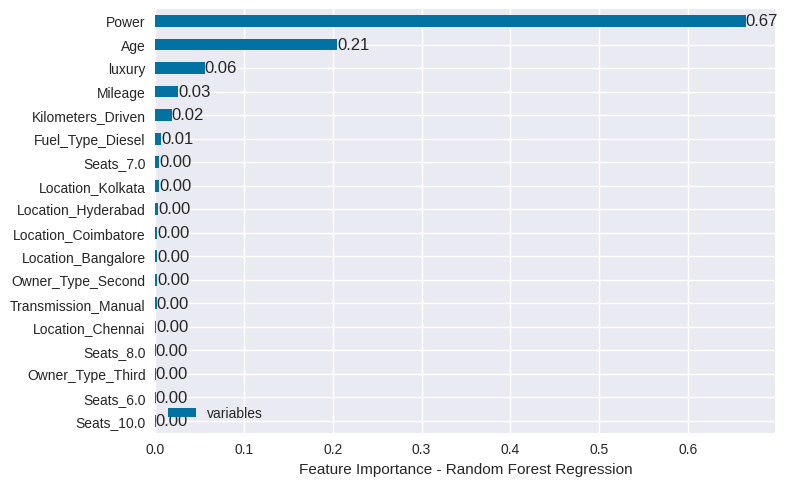

In [55]:
# Create dataframe of 
feature_imp = pd.DataFrame(index = cols, columns = ['variables'], 

# Plot Feature importance                           
data = best_pipeline.steps[1][1].feature_importances_).sort_values(by = 'variables')
ax = feature_imp.plot(kind = 'barh')
ax.bar_label(ax.containers[0], fmt='%1.2f')
ax.set_xlabel('Feature Importance - Random Forest Regression')
plt.show()

**Observations**
- The top 6 feature imortances remain the same as the in the case of linear regression.  
- We have lost the knowledge of the whether a given feature has a positive or negative influence on the price.
- The relative importances are not the same as in the case of linear regression and according to this, Power is by far the laregest impactor.
#
#

# Section 6 #
## Fully Automated Model ##
- This model will use a fully automated work-flow combining KNNImputer, StandardScaler, RandomForrestRegression in a Pipeline. 
- The pipline is used as the estimator for GridSearchCV 
- KNNImputer is used in place of manual imputation.  This will prevent data leakage by imputing fitting the imputer on the training data and transforming the validation data.  This is not the case with the previously manually imputed data.
- All the data will be used eliminating the need for manual variable reduction

**Prepare data**
- All data will be used except Name and New_price.  Log transform will be applied to Price.  

In [56]:
# Copy data, convert year to age
data_copy3 = data_copy.copy()
data_copy3['Age'] = data_copy3['Year']-1996
data_copy3.drop(columns = ['Year'], axis = 1, inplace = True)

# Create luxury and exotic categories
luxury = ('mercedes-benz', 'bmw', 'audi', 'land', 'jaguar', 'mini', 'volvo')
exotic = ('porche', 'bentley', 'lamborghini')
data_copy3['luxury'] = data_copy3['Make'].apply(lambda x: 1 if x in luxury else 0)
data_copy3['exotic'] = data_copy3['Make'].apply(lambda x: 1 if x in exotic else 0)

# Drop Name and columns created from Name
data_copy3.drop(['Name', 'Model', 'Make'], axis = 1, inplace = True)

# Filter out records missing Price
data_copy3 = data_copy3[data_copy3['Price'].isna() == False]

# Log transform independent variable 
y_log= np.log(data_copy3['Price']+1)
y = data_copy3['Price']
X = data_copy3.drop(labels = ['Price', 'New_price'], axis = 1)

# Create dummies
X = pd.get_dummies(X,  columns = ['Fuel_Type', 'Transmission', 'Owner_Type', 'Location', 'Seats'], dtype = int, drop_first = True)

# Conver to numpy arrays
X_array = X.to_numpy()
y_array = y_log.to_numpy()

**Model**
Perform gridsearch for optimal parameters

In [57]:
# Create a KFold cross-validation object
kf = KFold(n_splits=5, shuffle=True, random_state=1)

# Initialize KNNImputer, Standardscaler, and RandomForestRegressor
imputer = KNNImputer()
scalar = StandardScaler()
regressor = RFR(random_state=1)

# Create a pipeline with KNNImputer, StandardScaler, and RandomForestRegressor
pipeline = Pipeline([
    ('imputer', imputer),
    ('scaler', scaler),
    ('regressor', regressor)
])

# Define the parameter grid for GridSearchCV
param_grid = {
    'regressor__n_estimators': [700, 750, 800],
    'imputer__n_neighbors': [3, 4, 5],
    'regressor__min_samples_split': [1, 2, 3]
}

# Create a GridSearchCV object with estimator = pipeline, crossfold = kf, refit = false
grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=kf, n_jobs=-2, scoring = 'r2')

# Fit using gridsearch
model = grid_search.fit(X_array, y_array)

# Extract the best hyperparameters
best_params = model.best_params_

# Print parameters and best R squared on validation data
print("Best parameters:", best_params)
print("Best score:", grid_search.best_score_)

Best parameters: {'imputer__n_neighbors': 4, 'regressor__min_samples_split': 2, 'regressor__n_estimators': 750}
Best score: 0.9425778833543339


**Observations**
- An average R-sq over the 5 folds for the best parameters is 0.943
- This is superior to linear regression and on par with the previous section using random forest regression with manually imputed and reduced data.

**Model** 
- Using optimal hyperparameters, create model with explicit kfold validation to extract all fit metrics

In [58]:
summary_train = pd.DataFrame()
summary_test = pd.DataFrame()

# Create a new pipeline with the best parameters for use in explicit k-fold cross-validation
best_pipeline = Pipeline([
    ('imputer', KNNImputer(n_neighbors=best_params['imputer__n_neighbors'])),
    ('scaler', StandardScaler()),
    ('regressor', RFR(n_estimators=best_params['regressor__n_estimators'], 
                      min_samples_split=best_params['regressor__min_samples_split'], random_state=1))
])

# Perform k-fold cross-validation with the best pipeline
for fold, (train_index, test_index) in enumerate(kf.split(X_array)):
    X_train, X_test = X_array[train_index], X_array[test_index]
    y_train, y_test = y_array[train_index], y_array[test_index]

    # Fit the best pipeline on the training data
    model = best_pipeline.fit(X_train, y_train)
    
    # Collect performance for each fold using model = grid_search.best_estimator_
    # Place into dataframes for train data
    per_train = model_performance(model, X_train, y_train)
    summary_train = pd.concat([summary_train, per_train], axis = 0, ignore_index = True)

    # Collect performance for each fold using model =  grid_search.best_estimator_
    # Place into dataframes for train data
    per_test = model_performance(model, X_test, y_test)
    summary_test = pd.concat([summary_test, per_test], axis = 0, ignore_index = True)

# Print the summary dataframes and scores dataframe
print("\n\nSummary - Train Data:")
display(summary_train.describe().T)
print("\n\nSummary - Test Data:")
display(summary_test.describe().T)



Summary - Train Data:


,count,mean,std,min,25%,50%,75%,max
MAE,5.0,0.044709,0.000142,0.044469,0.044711,0.044745,0.044791,0.044831
MAPE (%),5.0,2.554423,0.013006,2.532166,2.555931,2.556667,2.562511,2.564839
RMSE,5.0,0.066191,0.000755,0.065215,0.065558,0.066623,0.066628,0.066931
R-sq,5.0,0.992439,0.000191,0.992269,0.992286,0.992352,0.992614,0.992673
R-sq adj,5.0,0.992388,0.000192,0.992217,0.992234,0.992300,0.992565,0.992624
# of recores,5.0,4809.600000,0.547723,4809.000000,4809.000000,4810.000000,4810.000000,4810.000000




Summary - Test Data:


,count,mean,std,min,25%,50%,75%,max
MAE,5.0,0.121615,0.004045,0.115804,0.119954,0.121644,0.124547,0.126125
MAPE (%),5.0,6.962478,0.219758,6.664520,6.929472,6.938282,6.999256,7.280861
RMSE,5.0,0.179017,0.007558,0.170488,0.172615,0.179279,0.184470,0.188235
R-sq,5.0,0.942731,0.005004,0.936564,0.938431,0.944173,0.946607,0.947881
R-sq adj,5.0,0.941164,0.005141,0.934827,0.936747,0.942644,0.945146,0.946454
# of recores,5.0,1202.400000,0.547723,1202.000000,1202.000000,1202.000000,1203.000000,1203.000000


**Observations**
- The average R-sq for the training data is .992 and MAE is .045
- The average R-sq for the validation  data is .943 and MAE is .122
- This result is superior to linear regression and on par with the previous section using random forest regression with manually imputed and reduced data.

**Display R-sq and MAE vs fold for train and test data.  Also visualize residuals for the final fold.**

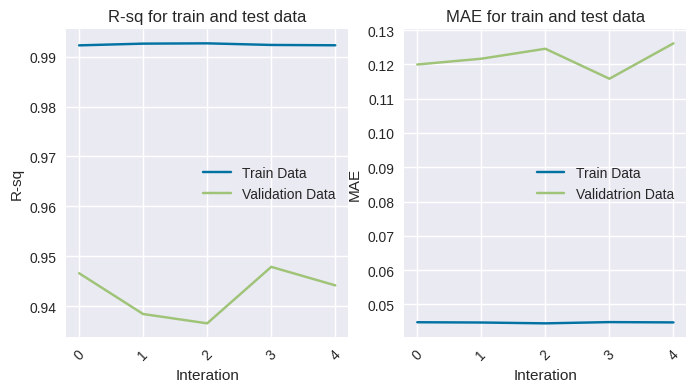

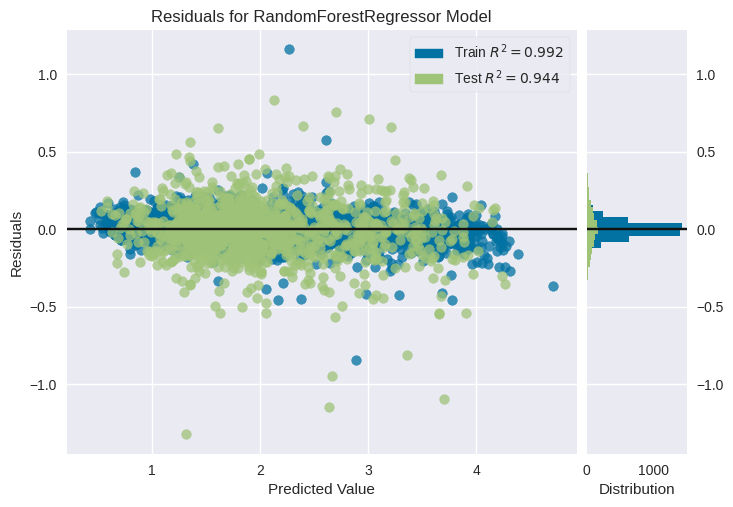

<Axes: title={'center': 'Residuals for RandomForestRegressor Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [59]:
# Define subplots
fig, ax = plt.subplots(1, 2, figsize=(8, 4))

# Plot train and test data R-sq on same axis
ax[0].plot(summary_train.index, summary_train['R-sq'])
ax[0].plot(summary_train.index, summary_test['R-sq'])
ax[0].legend(['Train Data', 'Validation Data'])
ax[0].set_xlabel('Interation')
ax[0].set_ylabel('R-sq')
ax[0].set_title('R-sq for train and test data')
ax[0].tick_params(axis = 'x', rotation = 45)


# Plot MAE for train and validation data for each fold on same axis
ax[1].plot(summary_train.index, summary_train['MAE'])
ax[1].plot(summary_train.index, summary_test['MAE'])
ax[1].legend(['Train Data', 'Validatrion Data'])
ax[1].set_xlabel('Interation')
ax[1].set_ylabel('MAE')
ax[1].set_title('MAE for train and test data')
ax[1].tick_params(axis = 'x', rotation = 45)
plt.show()
print('\n\n')

# Yellowbrick visualizer of residual for train and test data from grid search
visualizer = ResidualsPlot(model)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

**Observations**
- The fully automated module using KNNImputer with random forest regression gives similar R-sq and MAE results to the manually imputed data with random forest regression.


**Check correlation of predicted and actual data (reverse transformed)**

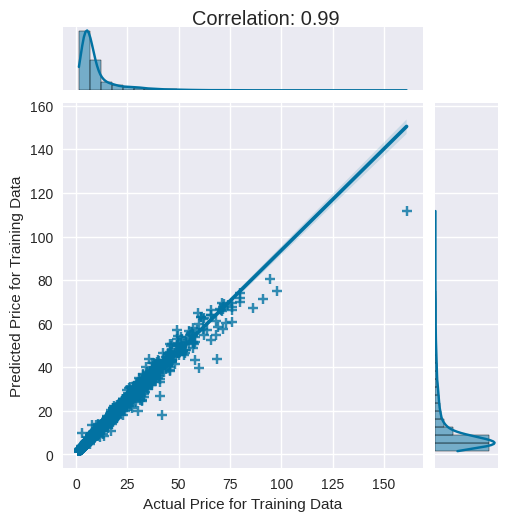

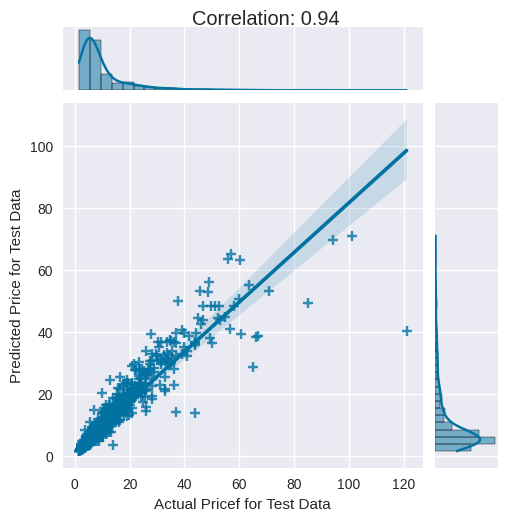

,MAE,MAPE (%),RMSE,R-sq,R-sq adj,# of recores
0,1.556521,12.660105,4.148007,0.8836,0.880414,1202.0


In [60]:
y_pred = np.exp(model.predict(X_train))
cor = round(np.corrcoef(y_pred,np.exp(y_train))[0,1],2)
sns.jointplot(y = y_pred, x = np.exp(y_train), kind='reg', marginal_kws=dict(bins=30), height = 5, marker = '+')
plt.suptitle('Correlation: ' + str(cor), y=1)
plt.xlabel('Actual Price for Training Data')
plt.ylabel('Predicted Price for Training Data')
plt.show()

y_pred = np.exp(model.predict(X_test))
cor = round(np.corrcoef(y_pred,np.exp(y_test))[0,1],2)
sns.jointplot(y = y_pred, x = np.exp(y_test), kind='reg', marginal_kws=dict(bins=30), height = 5, marker = '+')
plt.suptitle('Correlation: ' + str(cor), y=1)
plt.xlabel('Actual Pricef for Test Data')
plt.ylabel('Predicted Price for Test Data')
plt.show()



summary = pd.DataFrame()

R_sq = cor**2
target = np.exp(y_test)   
# Compute R-squared adjusted
R_sq_adj = 1-(1-R_sq)*(X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)
    
    # Put fit evaluation parameters into data frame
summary.loc[0, 'MAE'] = np.abs(y_pred - target).mean()
summary.loc[0,'MAPE (%)']  = (np.abs((y_pred - target)/target).mean()*100)
summary.loc[0,'RMSE']  = (np.sqrt(np.mean(np.square(y_pred - target))))
summary.loc[0,'R-sq'] = R_sq
summary.loc[0,'R-sq adj'] = R_sq_adj
summary.loc[0, '# of recores'] = len(target)

summary

**Observations**
- The correlation with the test data 0.94
- The mean absolute percentage error is 12.66%
#

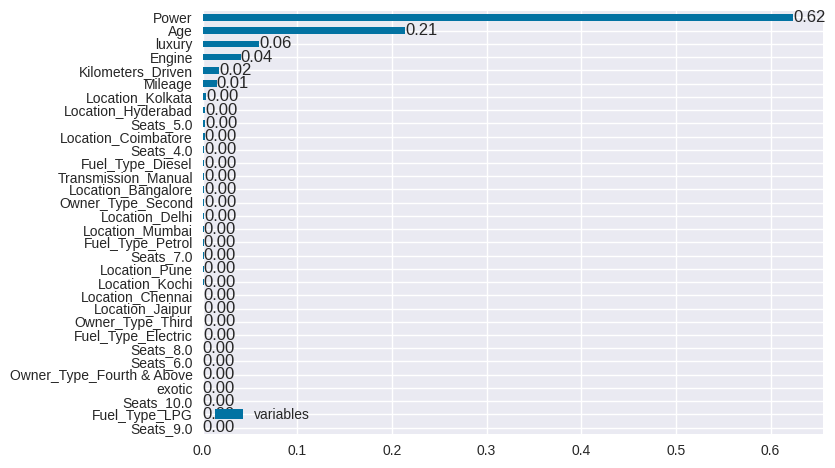

In [61]:
# Create dataframe of 
cols = X.columns
feature_imp = pd.DataFrame(index = cols, columns = ['variables'], 
                           data = best_pipeline.steps[2][1].feature_importances_).sort_values(by = 'variables')
# Plot feature importance
ax = feature_imp.plot(kind = 'barh')
ax.bar_label(ax.containers[0], fmt='%1.2f')
plt.show()

**Observations**
- It this case, there is a change in the feature importance as compared to the previous model.  The top 6 now contains Engine in place of Fuel_Type_Diesel. 
- The top 6 are Power, Age, Luxury, Engine, Kilometers_Driven, and Mileage.  This is because in the case of the manually reduced dataset in the cases above, Engine was eliminated for having a high VIF.
- Additional study could be to eliminate all but the top 6 and see how the model performs
#
#

# Conclusions and Recomendations #

## Three methods were tried to predict the used car values. ##

**First Method**
- Manually imputed data follwed by ordinary least squares regression using statsmodels.  Variables with high VIF >5 and high p-values >0.05 were systemitally eliminated to produce a final model.
- Missing data was manually imputed using median values when grouped by combinations of Make, Model, and year.
- K-fold cross validation reveals that this model is expected to produce an R-sq value of 0.91 on new data sets and obtain a mean absolute percentage error of 17.02%

**Second Method**
- Manually imputed data followed by random forest regression usind Scikit-learn.
- Hyperparameters were tuned using GridsearchCV with Pipline from scikit-learn.
- K-fold cross validation on the tuned model reveals that this method is expected to produce an R-sq of 0.94  and  a mean absolute percentage error of 12.11% on new data sets

**Third Method**
- KNNimputer was used to automatically impute missing data followed by random forest regression
- Hyperparameters for KNNImputer and RandomForestRegressor were optimized using GridsearchCV
- Pipeline was used to automate the process
- K-fold cross validation on the tuned model reveals that this method is expected to produce an R-sq of 0.94 and a mean absolute percentage error of 12.66% on new data sets

Of these three methods, I would recommend the third.  It does not have potential data leakage from manually imputing the train and test data together.  It also guarantees that the imputation process is consistent.  It is tied for best R-sq with the second method.  The notable disadvantages are the computation is noticeabley slower and it does not yield results which are as interpretable as the linear regression method.  However, this is likely offset by the fact that the imputation is automated an human interaction is not needed.  If interpretretable results are desired, the the first method is recommended

# Appendix #
## Additional model trials ##
- Simple model evaluations for:
1) Neural Network using MLPRegressor
2) Lasso Regression
3) Ridge Regression

In [62]:
#MLPRegressor model
mlp = MLPRegressor(max_iter = 2000)

# KNNImputer
imputer = KNNImputer()

# StandardScaler
scaler = StandardScaler()

# Create a pipeline
pipeline = Pipeline([('imputer', imputer), ('scaler', scaler), ('mlp', mlp)])

# Define the parameter grid for grid search
param_grid = {
    'imputer__n_neighbors': [1, 2, 3, 4, 5],  # Number of neighbors to consider for imputation
    'mlp__hidden_layer_sizes': [(40, 20, 10)],  # Hidden layer sizes of MLP
    'mlp__alpha': [.04, .1, .2, .25, .3]  # Regularization parameter for MLP
}

# Perform grid search with k-fold cross-validation
kf = KFold(n_splits=5, shuffle=True)
grid_search = GridSearchCV(pipeline, param_grid, cv=kf, n_jobs = -2)
grid_search.fit(X_array, y_array)

best_params = grid_search.best_params_

# Print the best parameters and best score
print("Best Parameters: ", best_params)
print("Best Score: ", grid_search.best_score_)

Best Parameters:  {'imputer__n_neighbors': 5, 'mlp__alpha': 0.25, 'mlp__hidden_layer_sizes': (40, 20, 10)}
Best Score:  0.9313618009418889


In [63]:
summary_train = pd.DataFrame()
summary_test = pd.DataFrame()

# Create a new pipeline with the best parameters for use in explicit k-fold cross-validation
best_pipeline = Pipeline([
    ('imputer', KNNImputer(n_neighbors=best_params['imputer__n_neighbors'])),
    ('scaler', StandardScaler()),
    ('mlp', MLPRegressor(alpha = best_params['mlp__alpha'], hidden_layer_sizes = (40, 20, 10)))
])

# Perform k-fold cross-validation with the best pipeline
for fold, (train_index, test_index) in enumerate(kf.split(X_array)):
    X_train, X_test = X_array[train_index], X_array[test_index]
    y_train, y_test = y_array[train_index], y_array[test_index]

    # Fit the best pipeline on the training data
    model = best_pipeline.fit(X_train, y_train)
    
    # Collect performance for each fold using model = grid_search.best_estimator_
    # Place into dataframes for train data
    per_train = model_performance(model, X_train, y_train)
    summary_train = pd.concat([summary_train, per_train], axis = 0, ignore_index = True)

    # Collect performance for each fold using model =  grid_search.best_estimator_
    # Place into dataframes for train data
    per_test = model_performance(model, X_test, y_test)
    summary_test = pd.concat([summary_test, per_test], axis = 0, ignore_index = True)

# Print the summary dataframes and scores dataframe
print("\n\nSummary - Train Data:")
display(summary_train.describe().T)
print("\n\nSummary - Test Data:")
display(summary_test.describe().T)



Summary - Train Data:


,count,mean,std,min,25%,50%,75%,max
MAE,5.0,0.132128,0.000987,0.130794,0.131624,0.132260,0.132541,0.133422
MAPE (%),5.0,7.477854,0.103609,7.384796,7.401944,7.433935,7.539984,7.628613
RMSE,5.0,0.179031,0.001407,0.177589,0.177688,0.179076,0.180023,0.180777
R-sq,5.0,0.943371,0.001497,0.941894,0.942059,0.943313,0.944081,0.945506
R-sq adj,5.0,0.942991,0.001507,0.941505,0.941671,0.942933,0.943707,0.945141
# of recores,5.0,4809.600000,0.547723,4809.000000,4809.000000,4810.000000,4810.000000,4810.000000




Summary - Test Data:


,count,mean,std,min,25%,50%,75%,max
MAE,5.0,0.142757,0.004994,0.138366,0.139142,0.140842,0.145022,0.150414
MAPE (%),5.0,8.073727,0.396482,7.710884,7.855499,7.965770,8.101638,8.734846
RMSE,5.0,0.196722,0.011938,0.185906,0.191083,0.193841,0.195762,0.217020
R-sq,5.0,0.931389,0.007883,0.918752,0.931107,0.932632,0.934136,0.940316
R-sq adj,5.0,0.929511,0.008098,0.916530,0.929221,0.930788,0.932334,0.938682
# of recores,5.0,1202.400000,0.547723,1202.000000,1202.000000,1202.000000,1203.000000,1203.000000


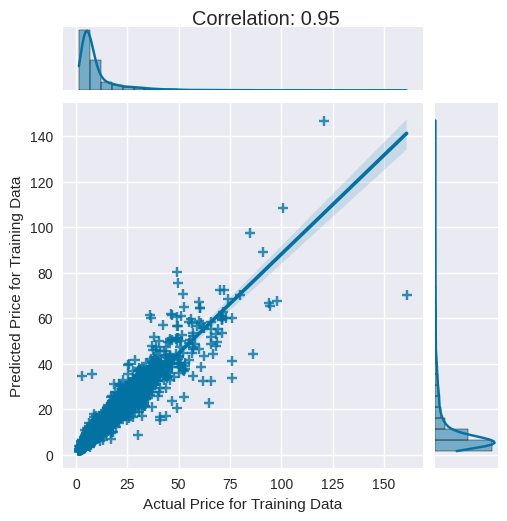

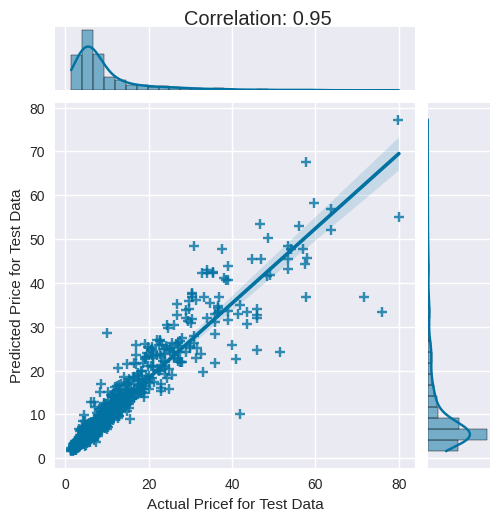

,MAE,MAPE (%),RMSE,R-sq,R-sq adj,# of recores
0,1.590509,14.287475,3.447425,0.9025,0.899831,1202.0


In [64]:
y_pred = np.exp(model.predict(X_train))
cor = round(np.corrcoef(y_pred,np.exp(y_train))[0,1],2)
sns.jointplot(y = y_pred, x = np.exp(y_train), kind='reg', marginal_kws=dict(bins=30), height = 5, marker = '+')
plt.suptitle('Correlation: ' + str(cor), y=1)
plt.xlabel('Actual Price for Training Data')
plt.ylabel('Predicted Price for Training Data')
plt.show()

y_pred = np.exp(model.predict(X_test))
cor = round(np.corrcoef(y_pred,np.exp(y_test))[0,1],2)
sns.jointplot(y = y_pred, x = np.exp(y_test), kind='reg', marginal_kws=dict(bins=30), height = 5, marker = '+')
plt.suptitle('Correlation: ' + str(cor), y=1)
plt.xlabel('Actual Pricef for Test Data')
plt.ylabel('Predicted Price for Test Data')
plt.show()



summary = pd.DataFrame()

R_sq = cor**2
target = np.exp(y_test)   
# Compute R-squared adjusted
R_sq_adj = 1-(1-R_sq)*(X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)
    
    # Put fit evaluation parameters into data frame
summary.loc[0, 'MAE'] = np.abs(y_pred - target).mean()
summary.loc[0,'MAPE (%)']  = (np.abs((y_pred - target)/target).mean()*100)
summary.loc[0,'RMSE']  = (np.sqrt(np.mean(np.square(y_pred - target))))
summary.loc[0,'R-sq'] = R_sq
summary.loc[0,'R-sq adj'] = R_sq_adj
summary.loc[0, '# of recores'] = len(target)

summary

In [65]:
# Lasso regression model
lasso = Lasso()

# KNNImputer
imputer = KNNImputer()

# StandardScaler
scaler = StandardScaler()

# Create a pipeline
pipeline = Pipeline([('imputer', imputer), ('scaler', scaler), ('lasso', lasso)])

# Define the parameter grid for grid search
param_grid = {
    'imputer__n_neighbors': [4, 5, 6],  # Number of neighbors to consider for imputation
    'lasso__alpha': [.0003, .0005, .0007, .001 ]  # Regularization parameter for Lasso
}

# Perform grid search with k-fold cross-validation
kf = KFold(n_splits=5, shuffle=True)
grid_search = GridSearchCV(pipeline, param_grid, cv=kf)
grid_search.fit(X_array, y_array)

# Print the best parameters and best score
print("Best Parameters: ", grid_search.best_params_)
print("Best Score: ", grid_search.best_score_)

Best Parameters:  {'imputer__n_neighbors': 4, 'lasso__alpha': 0.001}
Best Score:  0.9067202913850494


In [66]:
summary_train = pd.DataFrame()
summary_test = pd.DataFrame()
best_params = grid_search.best_params_
# Create a new pipeline with the best parameters for use in explicit k-fold cross-validation
best_pipeline = Pipeline([
    ('imputer', KNNImputer(n_neighbors=best_params['imputer__n_neighbors'])),
    ('scaler', StandardScaler()),
    ('lasso', Lasso(alpha = best_params['lasso__alpha']))
])

# Perform k-fold cross-validation with the best pipeline
for fold, (train_index, test_index) in enumerate(kf.split(X_array)):
    X_train, X_test = X_array[train_index], X_array[test_index]
    y_train, y_test = y_array[train_index], y_array[test_index]

    # Fit the best pipeline on the training data
    model = best_pipeline.fit(X_train, y_train)
    
    # Collect performance for each fold using model = grid_search.best_estimator_
    # Place into dataframes for train data
    per_train = model_performance(model, X_train, y_train)
    summary_train = pd.concat([summary_train, per_train], axis = 0, ignore_index = True)

    # Collect performance for each fold using model =  grid_search.best_estimator_
    # Place into dataframes for train data
    per_test = model_performance(model, X_test, y_test)
    summary_test = pd.concat([summary_test, per_test], axis = 0, ignore_index = True)

# Print the summary dataframes and scores dataframe
print("\n\nSummary - Train Data:")
display(summary_train.describe().T)
print("\n\nSummary - Test Data:")
display(summary_test.describe().T)



Summary - Train Data:


,count,mean,std,min,25%,50%,75%,max
MAE,5.0,0.167684,0.001601,0.166085,0.166549,0.167784,0.167791,0.170212
MAPE (%),5.0,9.605277,0.099942,9.501043,9.550660,9.566321,9.654063,9.754300
RMSE,5.0,0.226102,0.003115,0.221857,0.224239,0.227095,0.227384,0.229934
R-sq,5.0,0.908580,0.003414,0.904332,0.907581,0.907750,0.909567,0.913671
R-sq adj,5.0,0.907968,0.003437,0.903692,0.906962,0.907132,0.908961,0.913093
# of recores,5.0,4809.600000,0.547723,4809.000000,4809.000000,4810.000000,4810.000000,4810.000000




Summary - Test Data:


,count,mean,std,min,25%,50%,75%,max
MAE,5.0,0.168978,0.007084,0.158020,0.168198,0.168382,0.173794,0.176494
MAPE (%),5.0,9.676223,0.386106,9.106912,9.526988,9.712235,9.928881,10.106097
RMSE,5.0,0.227930,0.012783,0.211916,0.222134,0.225566,0.234281,0.245754
R-sq,5.0,0.906698,0.014763,0.883315,0.904960,0.909135,0.912617,0.923462
R-sq adj,5.0,0.904145,0.015166,0.880124,0.902360,0.906647,0.910225,0.921367
# of recores,5.0,1202.400000,0.547723,1202.000000,1202.000000,1202.000000,1203.000000,1203.000000


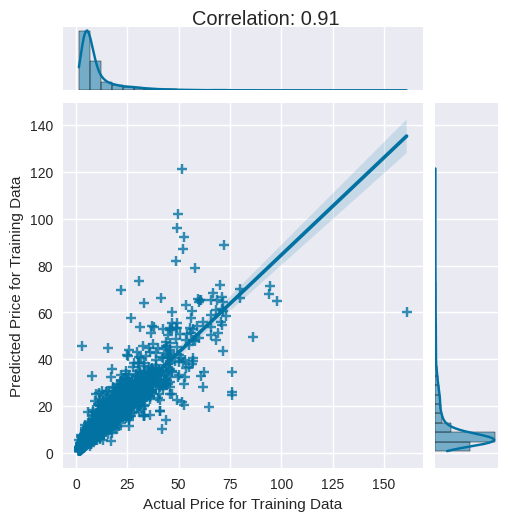

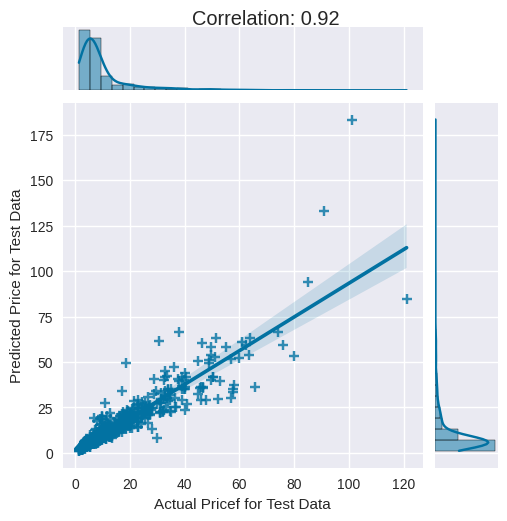

,MAE,MAPE (%),RMSE,R-sq,R-sq adj,# of recores
0,1.944399,16.279728,4.786882,0.8464,0.842195,1202.0


In [67]:
y_pred = np.exp(model.predict(X_train))
cor = round(np.corrcoef(y_pred,np.exp(y_train))[0,1],2)
sns.jointplot(y = y_pred, x = np.exp(y_train), kind='reg', marginal_kws=dict(bins=30), height = 5, marker = '+')
plt.suptitle('Correlation: ' + str(cor), y=1)
plt.xlabel('Actual Price for Training Data')
plt.ylabel('Predicted Price for Training Data')
plt.show()

y_pred = np.exp(model.predict(X_test))
cor = round(np.corrcoef(y_pred,np.exp(y_test))[0,1],2)
sns.jointplot(y = y_pred, x = np.exp(y_test), kind='reg', marginal_kws=dict(bins=30), height = 5, marker = '+')
plt.suptitle('Correlation: ' + str(cor), y=1)
plt.xlabel('Actual Pricef for Test Data')
plt.ylabel('Predicted Price for Test Data')
plt.show()



summary = pd.DataFrame()

R_sq = cor**2
target = np.exp(y_test)   
# Compute R-squared adjusted
R_sq_adj = 1-(1-R_sq)*(X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)
    
    # Put fit evaluation parameters into data frame
summary.loc[0, 'MAE'] = np.abs(y_pred - target).mean()
summary.loc[0,'MAPE (%)']  = (np.abs((y_pred - target)/target).mean()*100)
summary.loc[0,'RMSE']  = (np.sqrt(np.mean(np.square(y_pred - target))))
summary.loc[0,'R-sq'] = R_sq
summary.loc[0,'R-sq adj'] = R_sq_adj
summary.loc[0, '# of recores'] = len(target)

summary

In [68]:
# Ridge regression model
ridge = Ridge()

# KNNImputer
imputer = KNNImputer()

# StandardScaler
scaler = StandardScaler()

# Create a pipeline
pipeline = Pipeline([('imputer', imputer), ('scaler', scaler), ('ridge', ridge)])

# Define the parameter grid for grid search
param_grid = {
    'imputer__n_neighbors': [3, 4, 5, 6, 7],  # Number of neighbors to consider for imputation
    'ridge__alpha': [30, 35, 40, 45]  # Regularization parameter for Lasso
}

# Perform grid search with k-fold cross-validation
kf = KFold(n_splits=5, shuffle=True)
grid_search = GridSearchCV(pipeline, param_grid, cv=kf)
grid_search.fit(X_array, y_array)

# Print the best parameters and best score
print("Best Parameters: ", grid_search.best_params_)
print("Best Score: ", grid_search.best_score_)

Best Parameters:  {'imputer__n_neighbors': 7, 'ridge__alpha': 30}
Best Score:  0.9070911156273314


In [69]:
summary_train = pd.DataFrame()
summary_test = pd.DataFrame()
best_params = grid_search.best_params_
# Create a new pipeline with the best parameters for use in explicit k-fold cross-validation
best_pipeline = Pipeline([
    ('imputer', KNNImputer(n_neighbors=best_params['imputer__n_neighbors'])),
    ('scaler', StandardScaler()),
    ('ridge', Ridge(alpha = best_params['ridge__alpha']))
])

# Perform k-fold cross-validation with the best pipeline
for fold, (train_index, test_index) in enumerate(kf.split(X_array)):
    X_train, X_test = X_array[train_index], X_array[test_index]
    y_train, y_test = y_array[train_index], y_array[test_index]

    # Fit the best pipeline on the training data
    model = best_pipeline.fit(X_train, y_train)
    
    # Collect performance for each fold using model = grid_search.best_estimator_
    # Place into dataframes for train data
    per_train = model_performance(model, X_train, y_train)
    summary_train = pd.concat([summary_train, per_train], axis = 0, ignore_index = True)

    # Collect performance for each fold using model =  grid_search.best_estimator_
    # Place into dataframes for train data
    per_test = model_performance(model, X_test, y_test)
    summary_test = pd.concat([summary_test, per_test], axis = 0, ignore_index = True)

# Print the summary dataframes and scores dataframe
print("\n\nSummary - Train Data:")
display(summary_train.describe().T)
print("\n\nSummary - Test Data:")
display(summary_test.describe().T)



Summary - Train Data:


,count,mean,std,min,25%,50%,75%,max
MAE,5.0,0.167497,0.001288,0.165754,0.167078,0.167567,0.167758,0.169327
MAPE (%),5.0,9.578281,0.080017,9.475619,9.509996,9.621969,9.627730,9.656091
RMSE,5.0,0.225874,0.001571,0.224011,0.224560,0.226397,0.226535,0.227866
R-sq,5.0,0.908799,0.001377,0.907240,0.907433,0.909446,0.909570,0.910306
R-sq adj,5.0,0.908188,0.001386,0.906618,0.906813,0.908840,0.908964,0.909705
# of recores,5.0,4809.600000,0.547723,4809.000000,4809.000000,4810.000000,4810.000000,4810.000000




Summary - Test Data:


,count,mean,std,min,25%,50%,75%,max
MAE,5.0,0.168788,0.004658,0.162284,0.167319,0.169462,0.169682,0.175196
MAPE (%),5.0,9.654282,0.344979,9.293553,9.430005,9.516669,9.927301,10.103880
RMSE,5.0,0.227860,0.006320,0.219438,0.225315,0.226211,0.234018,0.234319
R-sq,5.0,0.907306,0.005715,0.900504,0.903773,0.905834,0.913051,0.913366
R-sq adj,5.0,0.904769,0.005872,0.897780,0.901139,0.903259,0.910671,0.910996
# of recores,5.0,1202.400000,0.547723,1202.000000,1202.000000,1202.000000,1203.000000,1203.000000


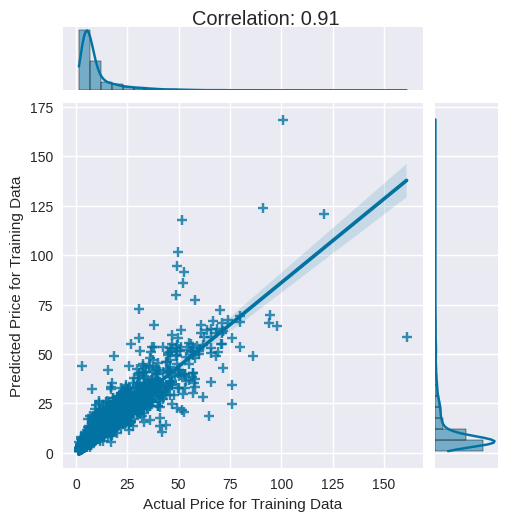

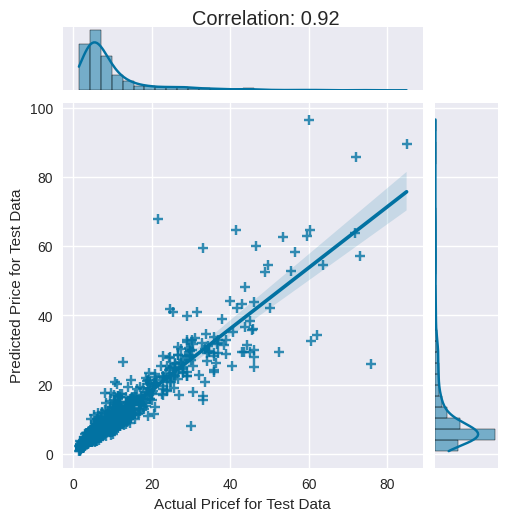

,MAE,MAPE (%),RMSE,R-sq,R-sq adj,# of recores
0,1.834676,16.669888,4.075641,0.8464,0.842195,1202.0


In [70]:
y_pred = np.exp(model.predict(X_train))
cor = round(np.corrcoef(y_pred,np.exp(y_train))[0,1],2)
sns.jointplot(y = y_pred, x = np.exp(y_train), kind='reg', marginal_kws=dict(bins=30), height = 5, marker = '+')
plt.suptitle('Correlation: ' + str(cor), y=1)
plt.xlabel('Actual Price for Training Data')
plt.ylabel('Predicted Price for Training Data')
plt.show()

y_pred = np.exp(model.predict(X_test))
cor = round(np.corrcoef(y_pred,np.exp(y_test))[0,1],2)
sns.jointplot(y = y_pred, x = np.exp(y_test), kind='reg', marginal_kws=dict(bins=30), height = 5, marker = '+')
plt.suptitle('Correlation: ' + str(cor), y=1)
plt.xlabel('Actual Pricef for Test Data')
plt.ylabel('Predicted Price for Test Data')
plt.show()



summary = pd.DataFrame()

R_sq = cor**2
target = np.exp(y_test)   
# Compute R-squared adjusted
R_sq_adj = 1-(1-R_sq)*(X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)
    
    # Put fit evaluation parameters into data frame
summary.loc[0, 'MAE'] = np.abs(y_pred - target).mean()
summary.loc[0,'MAPE (%)']  = (np.abs((y_pred - target)/target).mean()*100)
summary.loc[0,'RMSE']  = (np.sqrt(np.mean(np.square(y_pred - target))))
summary.loc[0,'R-sq'] = R_sq
summary.loc[0,'R-sq adj'] = R_sq_adj
summary.loc[0, '# of recores'] = len(target)

summary